# Les étudiant.e.s d'informatiques face à la situation sanitaire 

## Introduction


Ce notebook présentera rapidement les résultats d'un sondage mené parmis les étudiant.e.s d'informatique par l'association __IP7__, suite à une augmentation des témoignages faisant part d'un mal être et d'un sentiment d'abandon grandissant. 

Ce notebook a été réalisé par Marie Bétend en collaboration avec d'autres membres de l'association IP7. Les versions actualisées seront trouvables sur le [dépot github de l'association ](https://github.com/IP7/R-sultats-sondages/tree/main/Etu-SituationSanitaire) [IP7](http://ip7.informatique.univ-paris-diderot.fr:8080/).
Si vous êtes un.e étudiant.e de l'université de Paris vous pouvez répondre au sondage [ici](https://framaforms.org/les-etudiantes-dinformatiques-face-a-la-situation-sanitaire-1612121460).

Nous espérons que ces résultats pourrons aider l'ensemble de l'équipe enseignante à prendre conscience de la réalité que les étudiant.e.s traversent depuis plusieurs mois, et fournir des clefs qui permettront d'améliorer cette situation.

## Récupération des résultats et traitement

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML,  Markdown
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

tmp = range(37)
data = pd.read_csv('etu.tsv', delimiter = '\t', header = 2, usecols = tmp[-36:])

In [3]:
def to_category(df, labels):
    for e in labels:
        df[e] = df[e].astype('category')

def reorder_cat(df, labels, newOrder):
    for e in labels :
        if 'Ne souhaite pas répondre' not in data[e].cat.categories :
            data[e].cat.add_categories(['Ne souhaite pas répondre'], inplace = True)
        data[e].cat.reorder_categories(ordre, inplace = True)

In [4]:
lab = ["Vous êtes ",
       "En quelle année êtes-vous ?",
       "Vous sentez-vous épanoui(e) dans vos études ?",
       "Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?",
       "Avez-vous ressenti l'envie d'arrêter vos études? ",
       "Avez-vous consulté un(e) psychologue ou un(e) psychiatre suite à des difficultés liées à la situation sanitaire ?",
       "Si vous-même demain, étiez concerné(e) par l’apparition d’un trouble mental, et que vous ressentiez le besoin de consulter et d’être pris(e) en charge, sauriez-vous à qui vous adresser ?",
       "Vous sentez-vous isolé(e) socialement ?",
       "Selon vous, le bien-être des étudiant(e)s est-il mis de côté ? ",
       "Un sentiment de nervosité, d’anxiété ou de tension",
       "Une tendance à être facilement contrarié(e) ou irritable",
       "Des difficultés à se détendre",
       "Une inquiétude excessive à propos de différentes choses",
       "Une incapacité à arrêter de s’inquiéter ou à contrôler ses inquiétudes",
       "Une agitation telle qu’il est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire",
       "Vous sentir fatigué(e) ou avoir peu d’énergie ",
       "Difficultés à vous endormir, à rester endormi ou trop dormir",
       "Vous sentir triste, déprimé(e) ou désespéré(e)",
       "Avoir peu d'appétit ou trop d'appétit",
       "Peu d'intérêt ou de plaisir à faire les choses",
       "Mauvaise perception de vous-même, vous pensez que vous êtes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficultés à vous concentrer sur des choses telles que lire le journal ou regarder la télévision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous êtes si agité(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pensé que vous seriez mieux mort(e) ou vous avez pensé à vous blesser d'une façon ou d'une autre",
       "Considérez-vous que les modalités d’enseignement actuelles permettent une formation correcte ?",
       "Etes-vous favorable à une réouverture des facultés et des amphithéâtres ?",
       "Si les facs réouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en présentiel ? ",
       "Avez-vous dû changer de logement à cause de la situation sanitaire ?",
       "Avez-vous bénéficié d'une aide alimentaire avant le premier confinement ?",
       "Avez-vous eu besoin d'une aide alimentaire depuis le début de la crise sanitaire ?"]
to_category(data, lab)


In [5]:
qIpsos = ["Un sentiment de nervosité, d’anxiété ou de tension",
       "Une tendance à être facilement contrarié(e) ou irritable",
       "Des difficultés à se détendre",
       "Une inquiétude excessive à propos de différentes choses",
       "Une incapacité à arrêter de s’inquiéter ou à contrôler ses inquiétudes",
       "Une agitation telle qu’il est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire",
       "Vous sentir fatigué(e) ou avoir peu d’énergie ",
       "Difficultés à vous endormir, à rester endormi ou trop dormir",
       "Vous sentir triste, déprimé(e) ou désespéré(e)",
       "Avoir peu d'appétit ou trop d'appétit",
       "Peu d'intérêt ou de plaisir à faire les choses",
       "Mauvaise perception de vous-même, vous pensez que vous êtes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficultés à vous concentrer sur des choses telles que lire le journal ou regarder la télévision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous êtes si agité(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pensé que vous seriez mieux mort(e) ou vous avez pensé à vous blesser d'une façon ou d'une autre" ]
ordre = ['Ne souhaite pas répondre', 'Jamais',  'Plusieurs jours', 'Plus de la moitié du temps', 'Presque tous les jours']


reorder_cat(data, qIpsos, ordre)

In [6]:
data["Vous sentez-vous épanoui(e) dans vos études ?"].cat.rename_categories({1: ' 1 = Pas du tout',
                                                                             2: '2 = Pas vraiment',
                                                                             3: '3 = Neutre',
                                                                            4: '4 = Plutôt oui',
                                                                            5 : '5 = Très fortement'}, inplace = True)
data["Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?"].cat.reorder_categories(['Non', 'Oui un peu', 'Oui beaucoup'], inplace = True)

data["Si vous-même demain, étiez concerné(e) par l’apparition d’un trouble mental, et que vous ressentiez le besoin de consulter et d’être pris(e) en charge, sauriez-vous à qui vous adresser ?"].cat.reorder_categories(['Ne souhaite pas répondre', 'Non, pas du tout', 'Non, plutot pas',  'Oui, à peu près','Oui, tout à fait'], inplace=True)
qOui = ["Vous sentez-vous isolé(e) socialement ?",
       "Selon vous, le bien-être des étudiant(e)s est-il mis de côté ? ",
       "Considérez-vous que les modalités d’enseignement actuelles permettent une formation correcte ?"]
ordre =  ['Ne souhaite pas répondre', 'Non pas du tout', 'Non pas trop', 'Oui plutôt', 'Oui beaucoup']
reorder_cat(data, qOui, ordre)

data["Avez-vous dû changer de logement à cause de la situation sanitaire ?"].cat.reorder_categories(['Ne souhaite pas répondre', 'Non', 'Oui une fois', 'Oui plusieurs fois'], inplace = True)
data["Si les facs réouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en présentiel ? "].cat.reorder_categories(['Ne souhaite pas répondre',  'Non', 'Ne sait pas encore', 'Oui'], inplace = True)

In [7]:
for e in lab :
    data[e].cat.remove_unused_categories(inplace = True)

In [8]:
from math import isnan
def perc_hue(plot, feature, hue):
    numCat = data[feature].nunique()
    numHue = data[hue].nunique()
    patch = [p for p in plot.patches]
    
    a = [p.get_height() for p in patch]
    
    for i in range(numCat):
        total = data[feature].value_counts(sort=False).values[i]
        for j in range(numHue):
            percentage = '{:.1f}%'.format(100 * a[(j*numCat + i)]/total)
            x = patch[(j*numCat + i)].get_x() + patch[(j*numCat + i)].get_width() / 2 - 0.08
            y = patch[(j*numCat + i)].get_y() + patch[(j*numCat + i)].get_height() /2
            plot.annotate(percentage, (x, y), size = 12, color='black')

def perc_no_hue(plot, feature):
    total = len(data[feature])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.25*p.get_width()
        y = p.get_y() + p.get_height()/2
        plot.annotate(percentage, (x, y), color='black')

In [9]:
import matplotlib.pyplot as plt
sns.set() 

def plot_both(x,y) :
    fig = plt.figure(figsize=(28,7))
    grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

    ax1 = fig.add_subplot(grid[0,1:])
    ax1.title.set_text('En distinguant les années')
    plot = sns.countplot(ax = ax1,x=y, hue=x, data=data)
    plot.set_xlabel("")
    plot.set_ylabel("Nombre d'étudiant.e.s")
    perc_hue(plot, y,x )
    
    ax2 = fig.add_subplot(grid[0,0])
    ax2.title.set_text('Toutes années confondues')
    plot2 = sns.countplot(ax = ax2, x=x, data=data)
    perc_no_hue(plot2,x)
    plot2.set_xlabel("")
    plot2.set_ylabel("Nombre d'étudiant.e.s")
    labels = list(data[x].cat.categories)
    plot2.set_xticklabels(labels, fontsize=14, rotation=30, ha= 'right');
    
    fig.suptitle(x, fontsize = 17)
    

## Résultats 

Commençons par le nombre de résultats recueillis depuis la mise en ligne du sondage le 01 février 2021.

In [10]:
len(data)

143

Observons également rapidement la proportion des étudiant.e.s de chaque année ayant répondu.

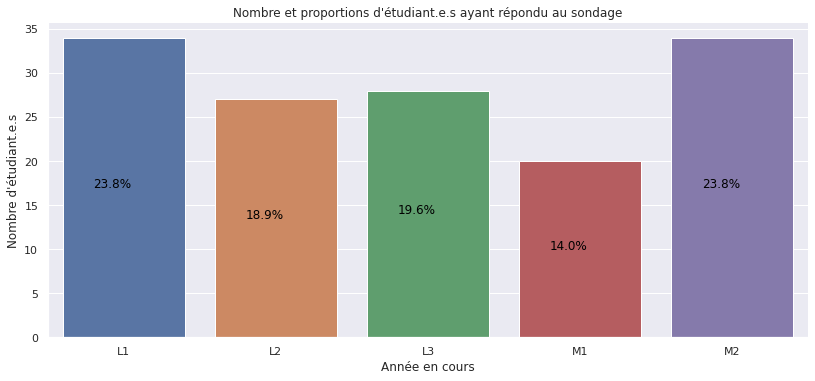

In [11]:
plot = sns.catplot(x="En quelle année êtes-vous ?", kind="count", data=data, aspect=18/8)
plot.set_axis_labels("Année en cours", "Nombre d'étudiant.e.s")
plot.ax.set_title('Nombre et proportions d\'étudiant.e.s ayant répondu au sondage')
perc_no_hue(plot.ax , "En quelle année êtes-vous ?")

### Ressenti des étudiant.e.s


####  Troubles anxieux

Les questions qui suivent proviennent de [cette étude de l'IPSOS : "PERCEPTIONS ET REPRÉSENTATIONS DES MALADIES MENTALES AVEC L’URGENCE SANITAIRE, L’URGENCE PSYCHIATRIQUE FOCUS JEUNES 18-24 ANS"](https://www.ipsos.com/sites/default/files/ct/news/documents/2021-01/ipsos_rapport_fondamental_focus_jeunes_0.pdf), réalisée en janvier 2021.

L'énoncé était : " _Dans le contexte de la Covid-19, à quelle fréquence avez-vous été gêné(e) par les problèmes suivants dans les deux dernières semaines ?_ "

In [12]:
qIpsosAnx = ["Un sentiment de nervosité, d’anxiété ou de tension",
       "Une tendance à être facilement contrarié(e) ou irritable",
       "Des difficultés à se détendre",
       "Une inquiétude excessive à propos de différentes choses",
       "Une incapacité à arrêter de s’inquiéter ou à contrôler ses inquiétudes",
       "Une agitation telle qu’il est difficile de tenir en place",
       "Un sentiment de peur comme si quelque chose de terrible risquait de se produire"]
qIpsosDepr = ["Vous sentir fatigué(e) ou avoir peu d’énergie ",
       "Difficultés à vous endormir, à rester endormi ou trop dormir",
       "Vous sentir triste, déprimé(e) ou désespéré(e)",
       "Avoir peu d'appétit ou trop d'appétit",
       "Peu d'intérêt ou de plaisir à faire les choses",
       "Mauvaise perception de vous-même, vous pensez que vous êtes un(e) perdant(e) ou que vous n'avez pas satisfait vos propres attentes ou celles de votre famille",
       "Difficultés à vous concentrer sur des choses telles que lire le journal ou regarder la télévision",
       "Vous bougez ou vous parlez si lentement que les autres personnes ont pu le remarquer. Ou, au contraire, vous êtes si agité(e) que vous bougez beaucoup plus que d'habitude",
       "Vous avez pensé que vous seriez mieux mort(e) ou vous avez pensé à vous blesser d'une façon ou d'une autre"]

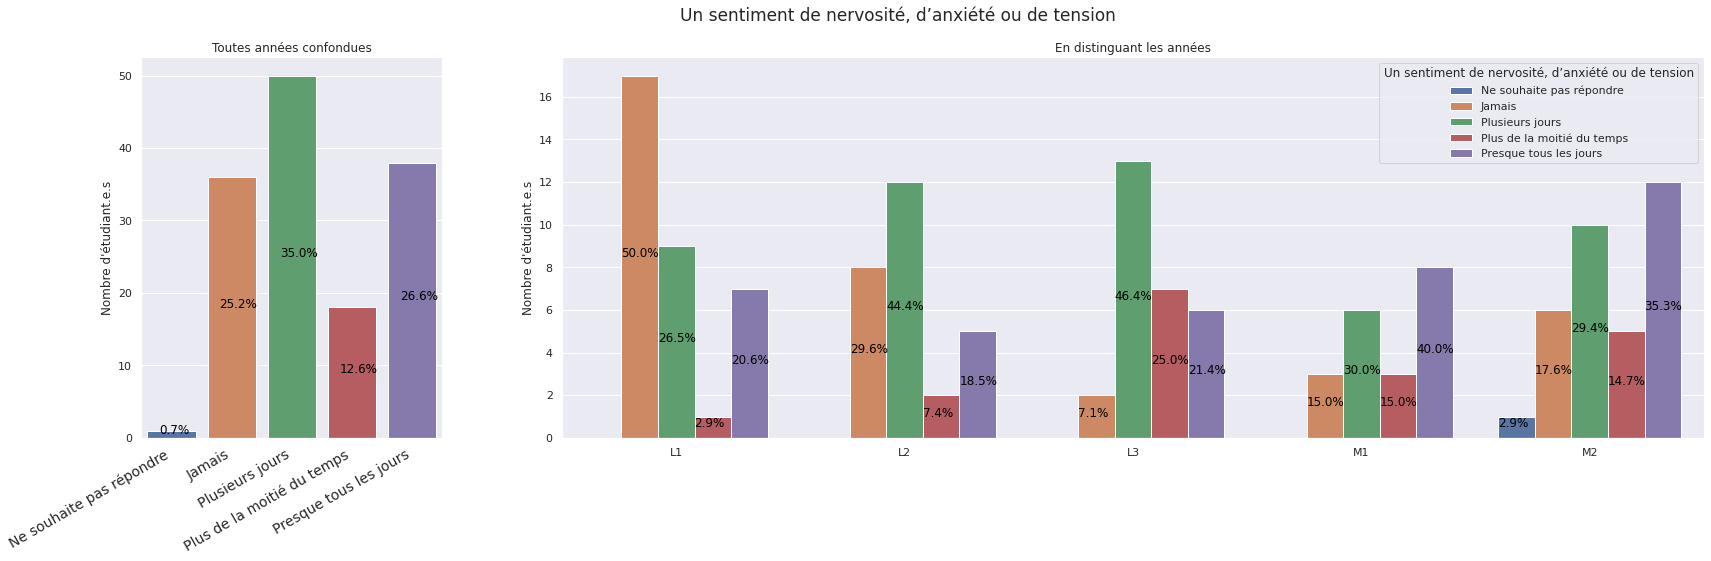

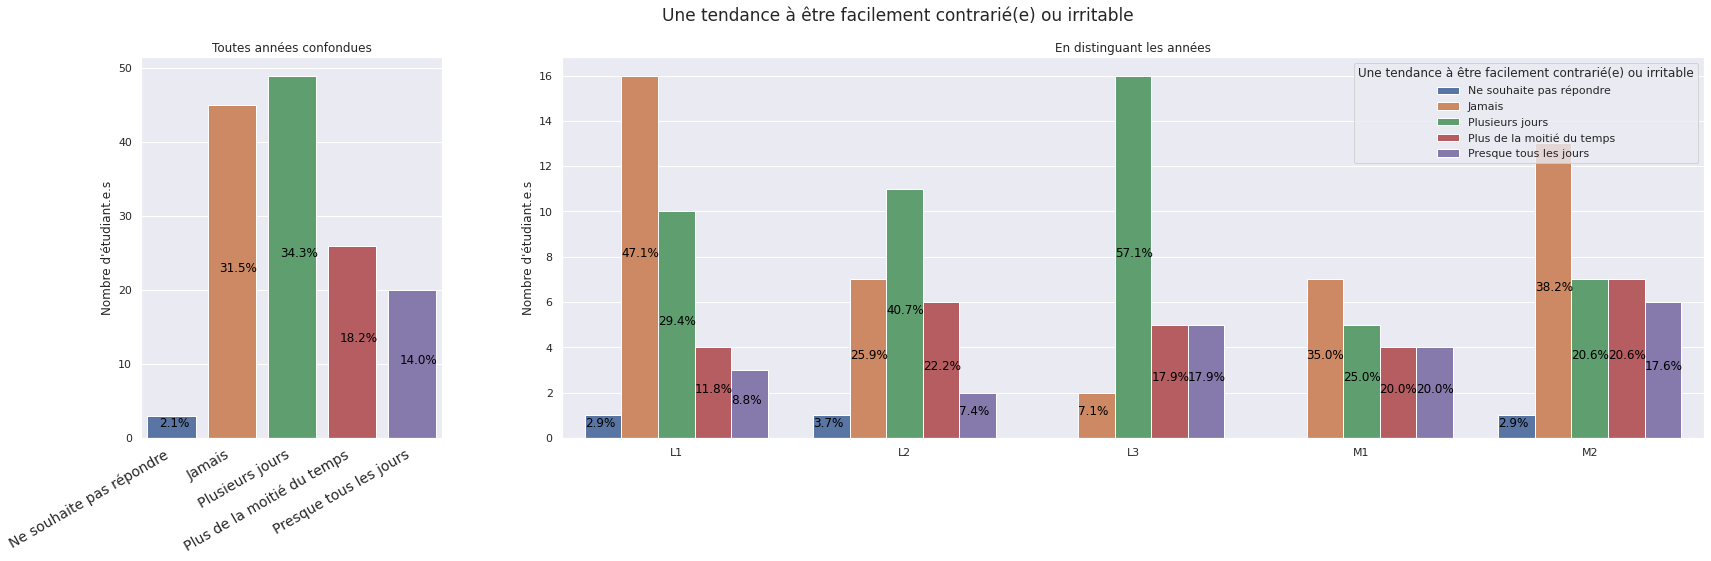

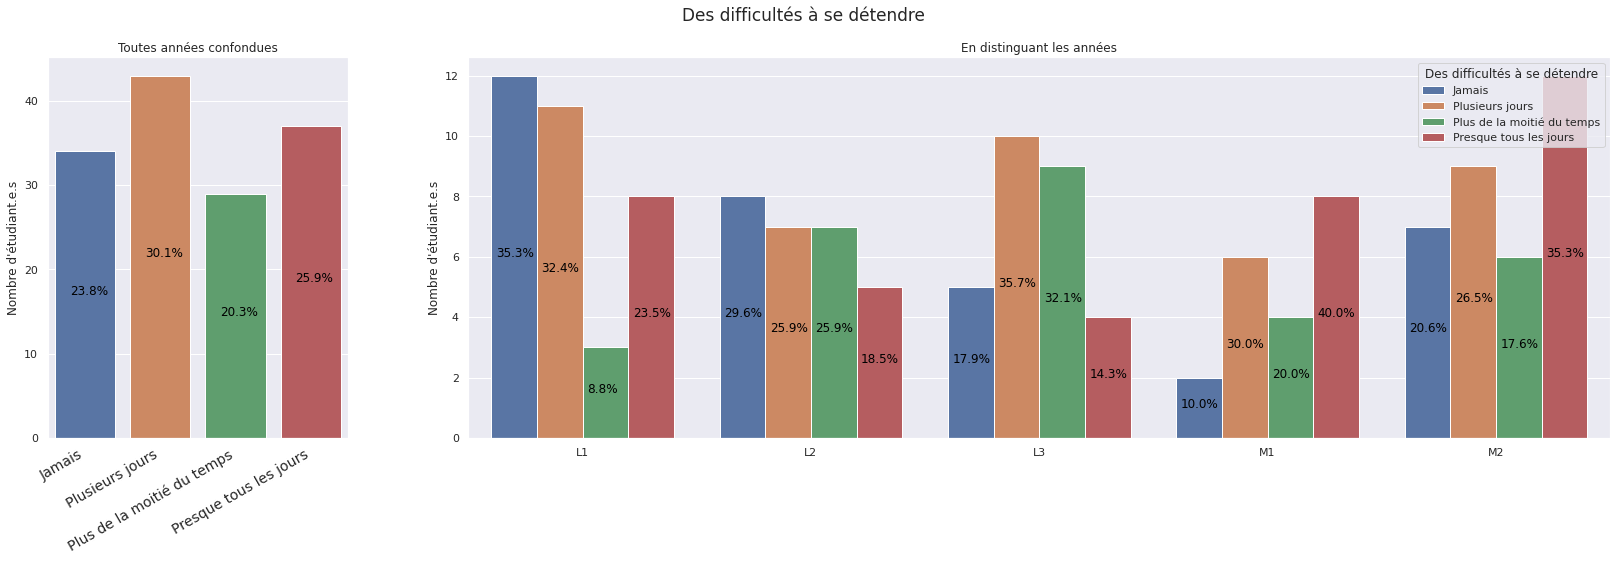

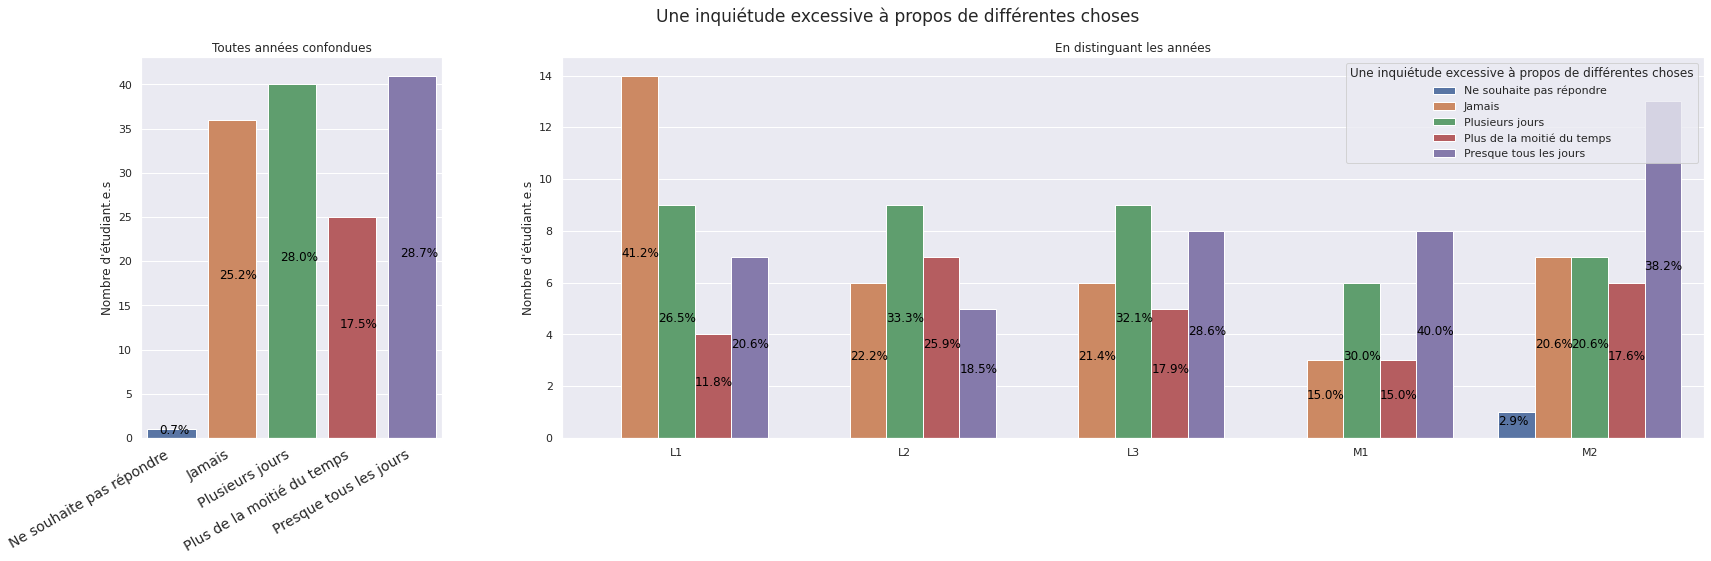

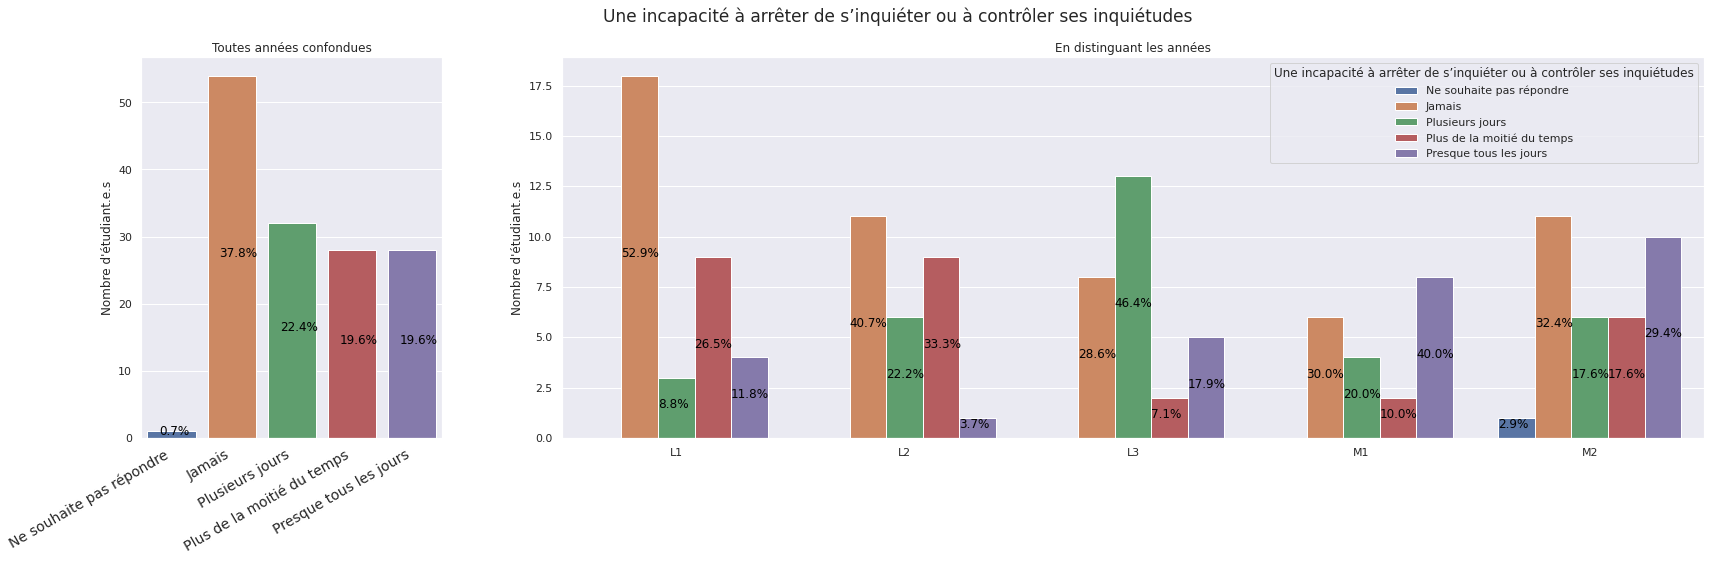

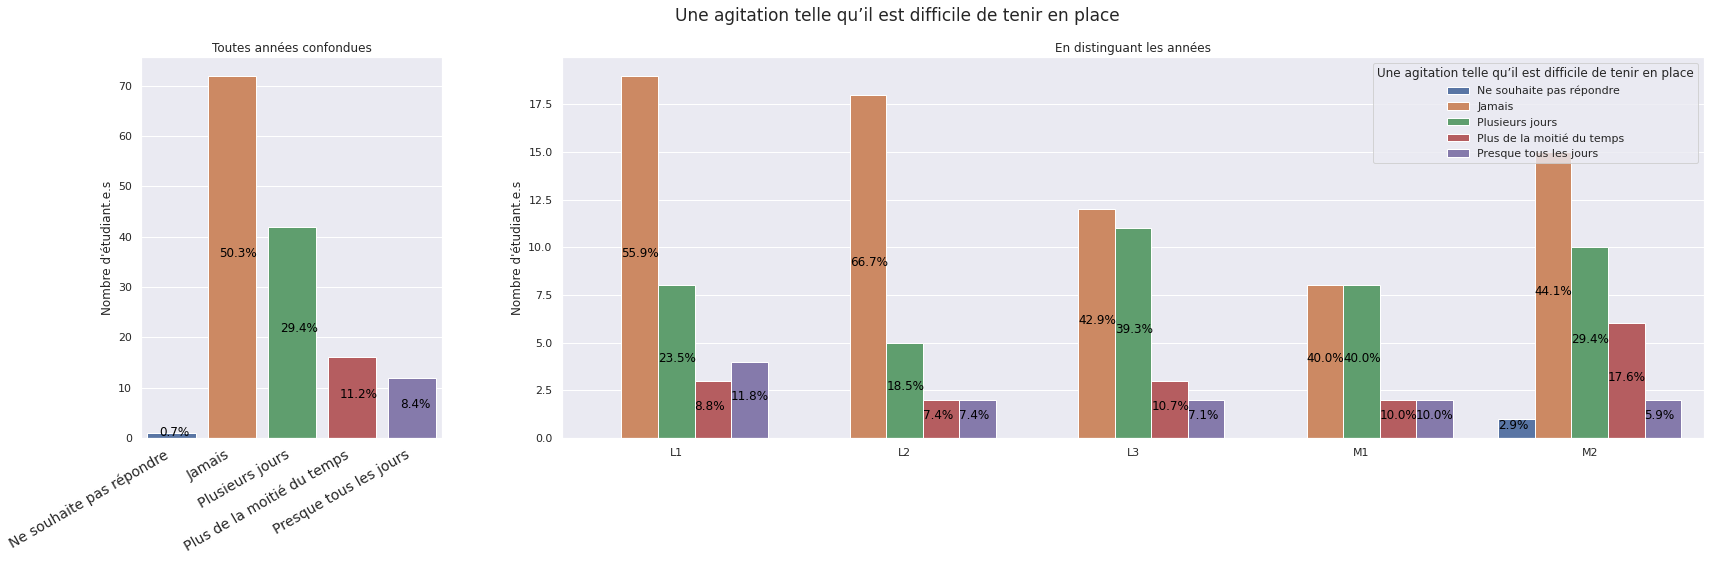

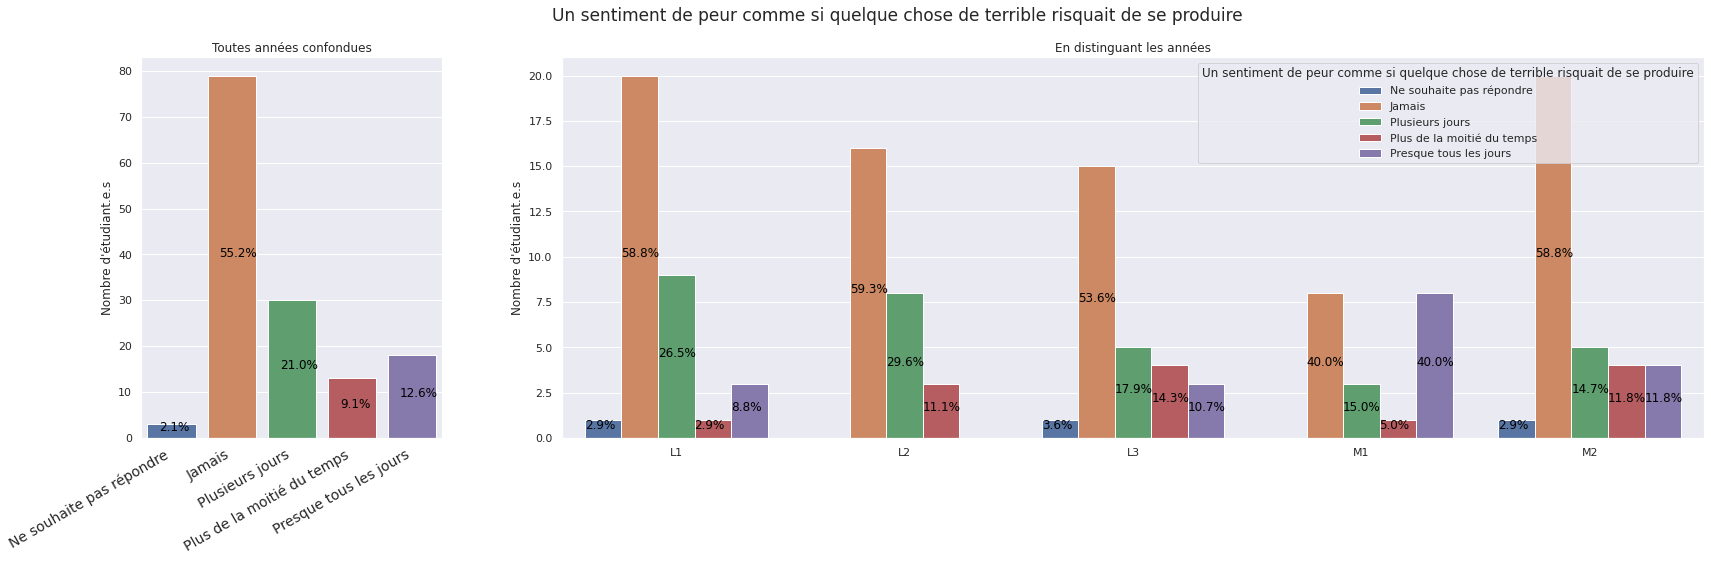

In [13]:
for i in qIpsosAnx :
    plot_both(i,"En quelle année êtes-vous ?")

#### Troubles dépréssifs

À nouveau les questions de cette section proviennent de l'[étude de l'IPSOS précédemment citée](https://www.ipsos.com/sites/default/files/ct/news/documents/2021-01/ipsos_rapport_fondamental_focus_jeunes_0.pdf).

L'énoncé était : " _Dans le contexte de la Covid-19, à quelle fréquence avez-vous été gêné(e) par les problèmes suivants dans les deux dernières semaines ?_ "

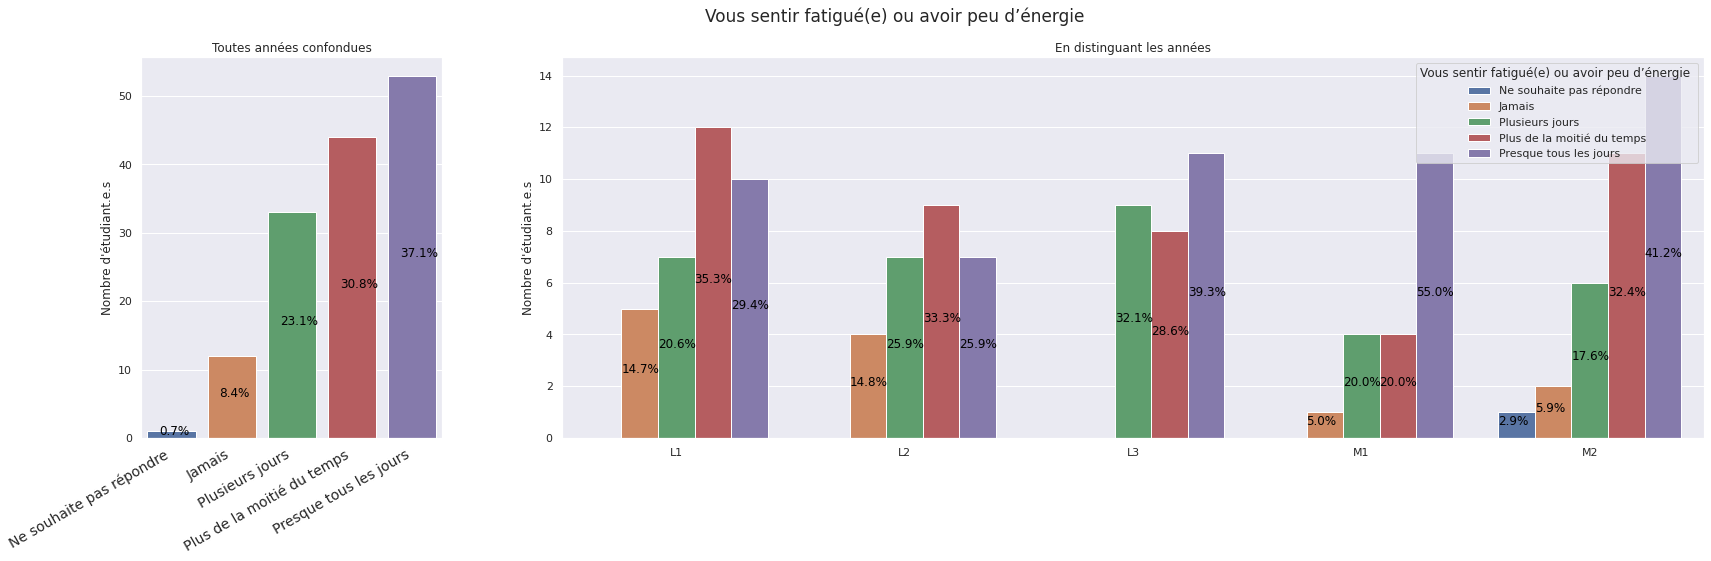

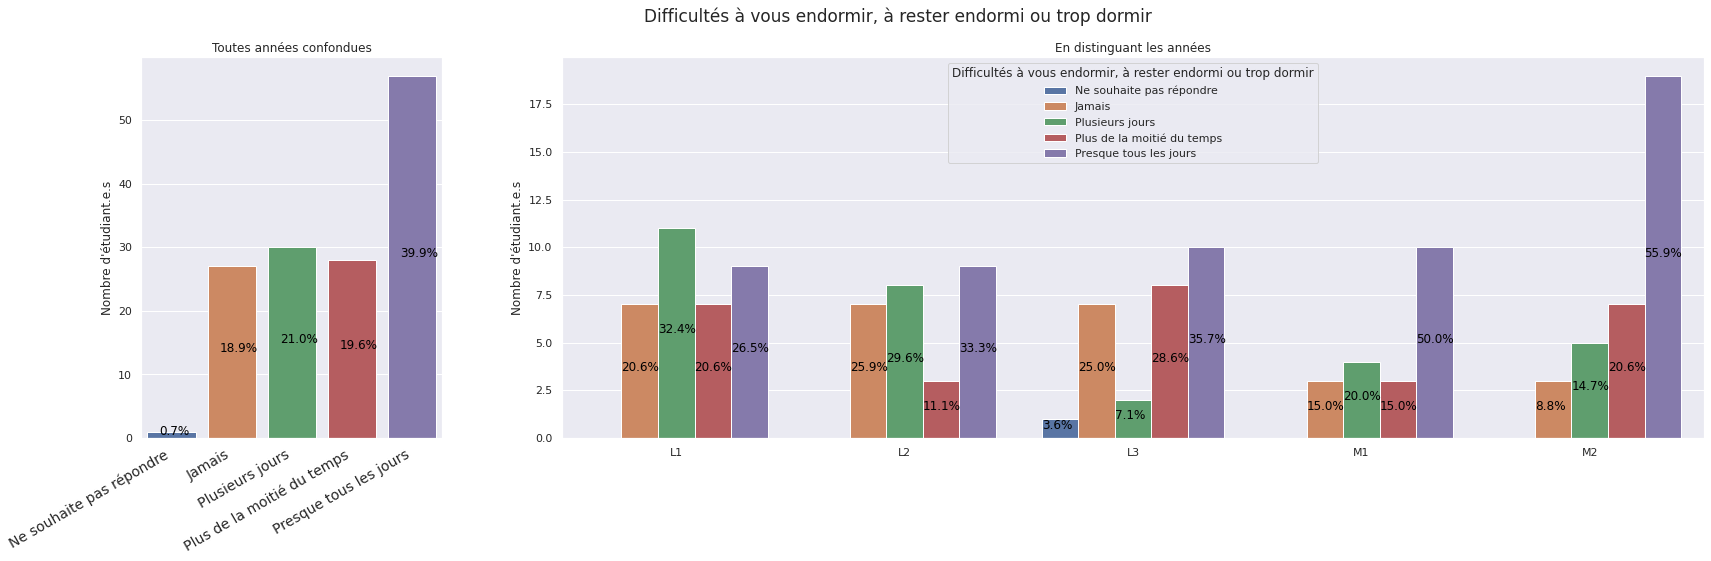

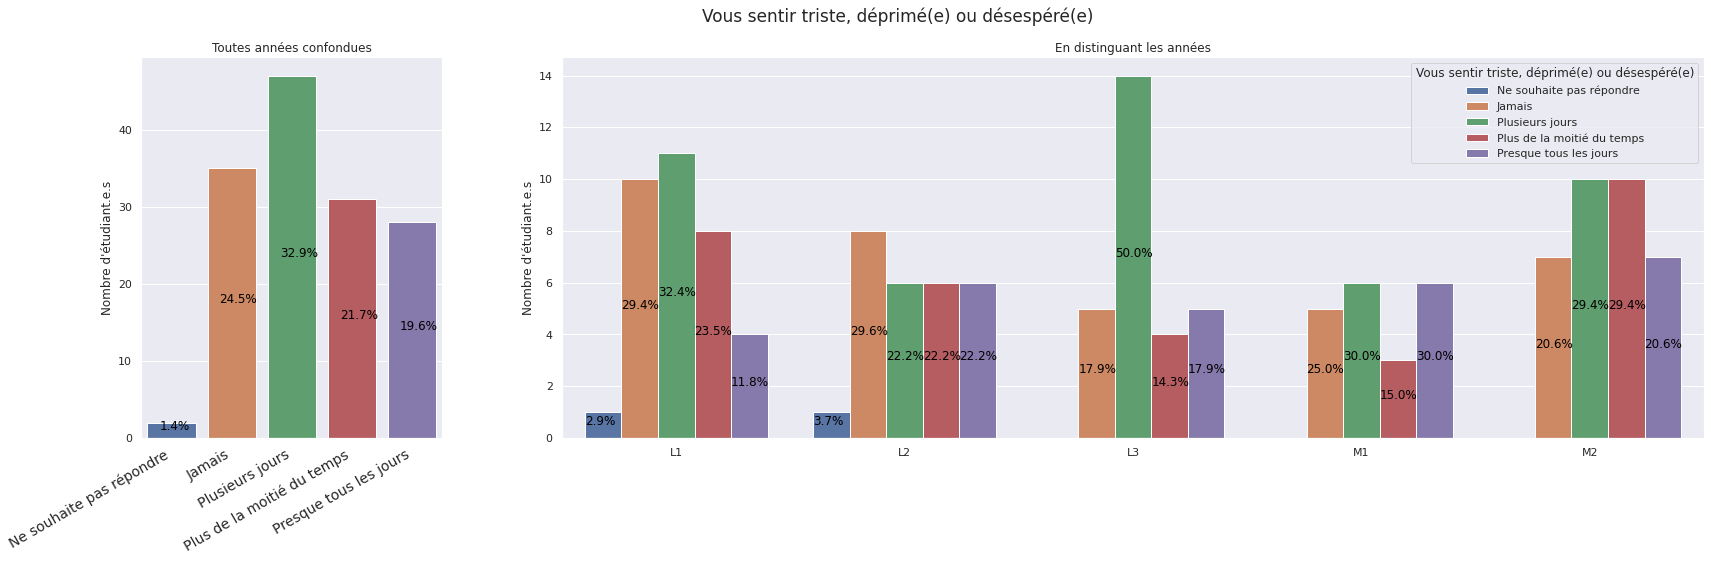

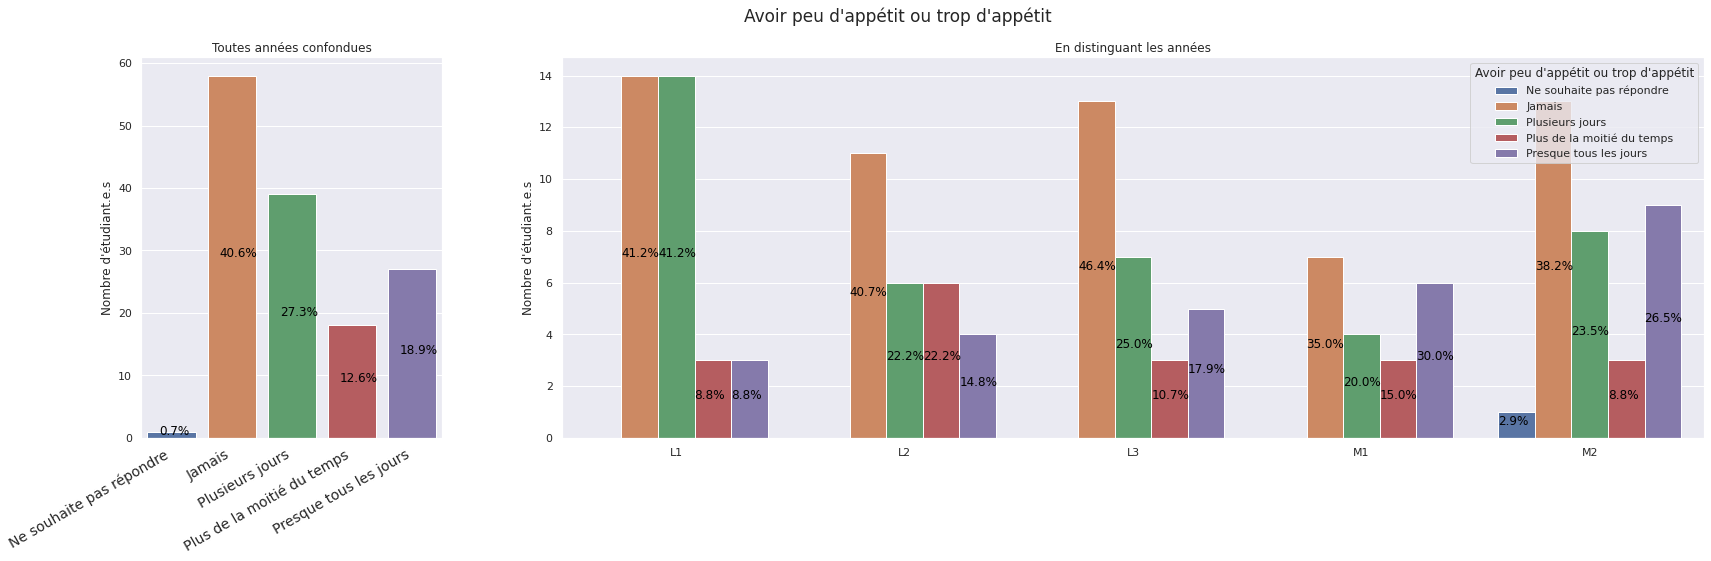

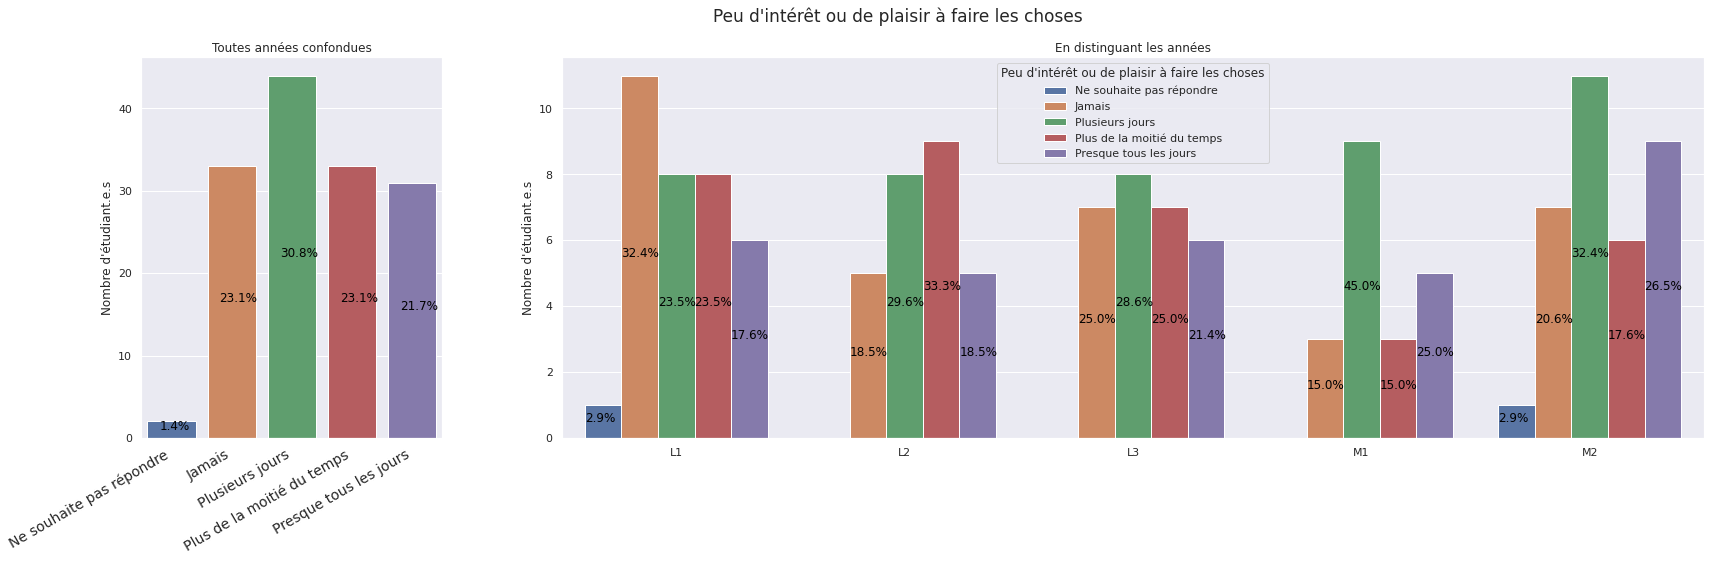

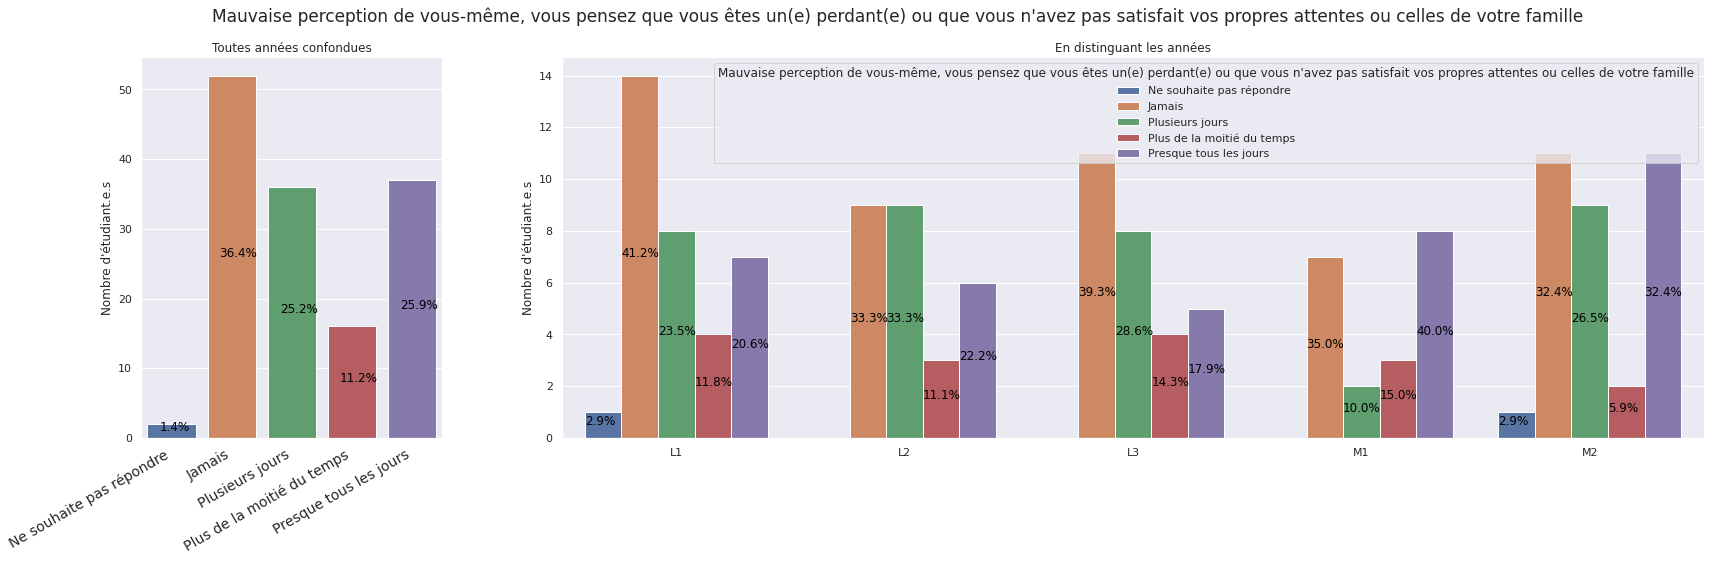

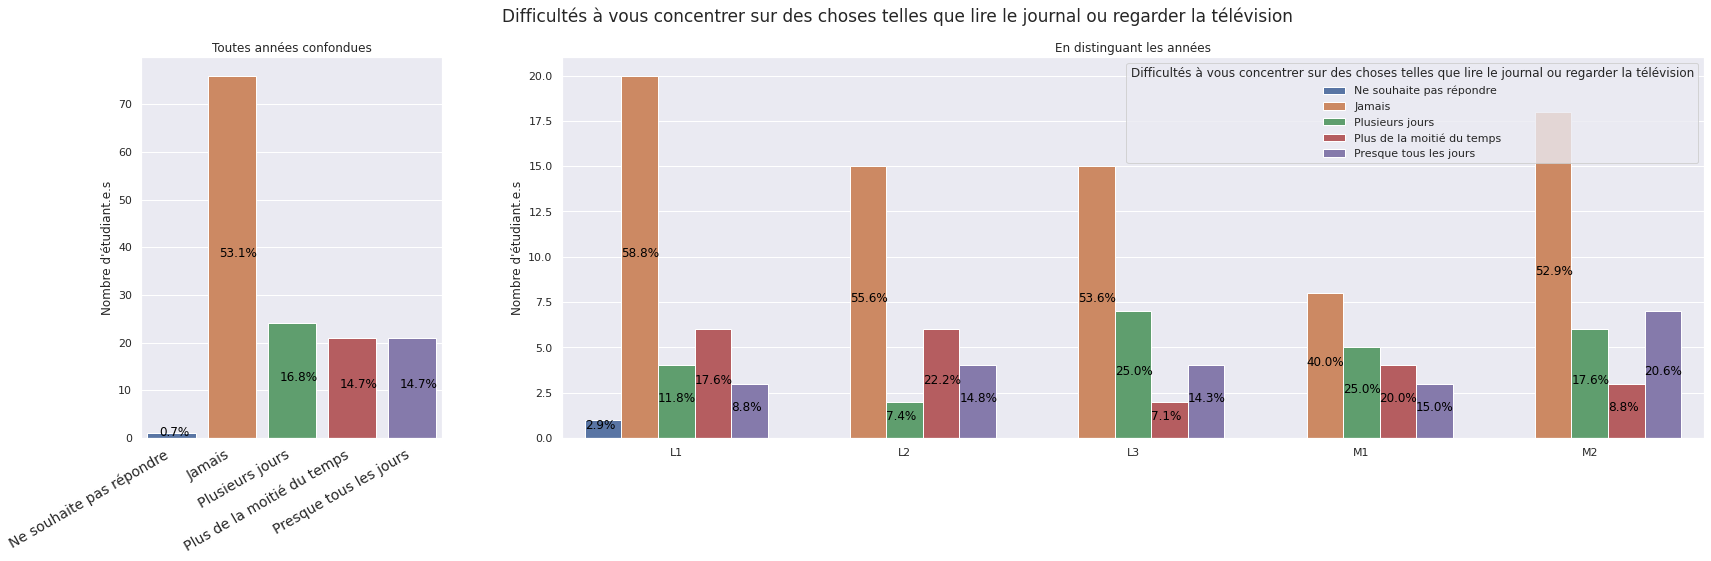

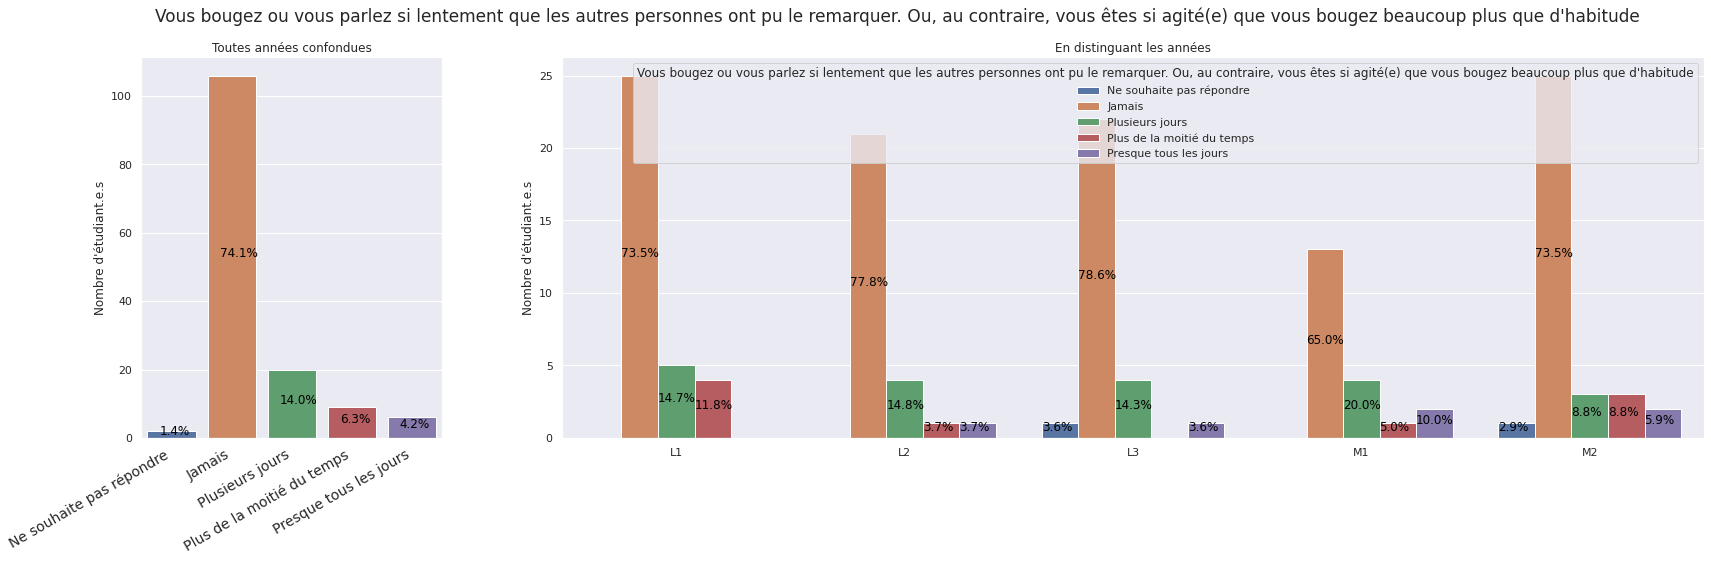

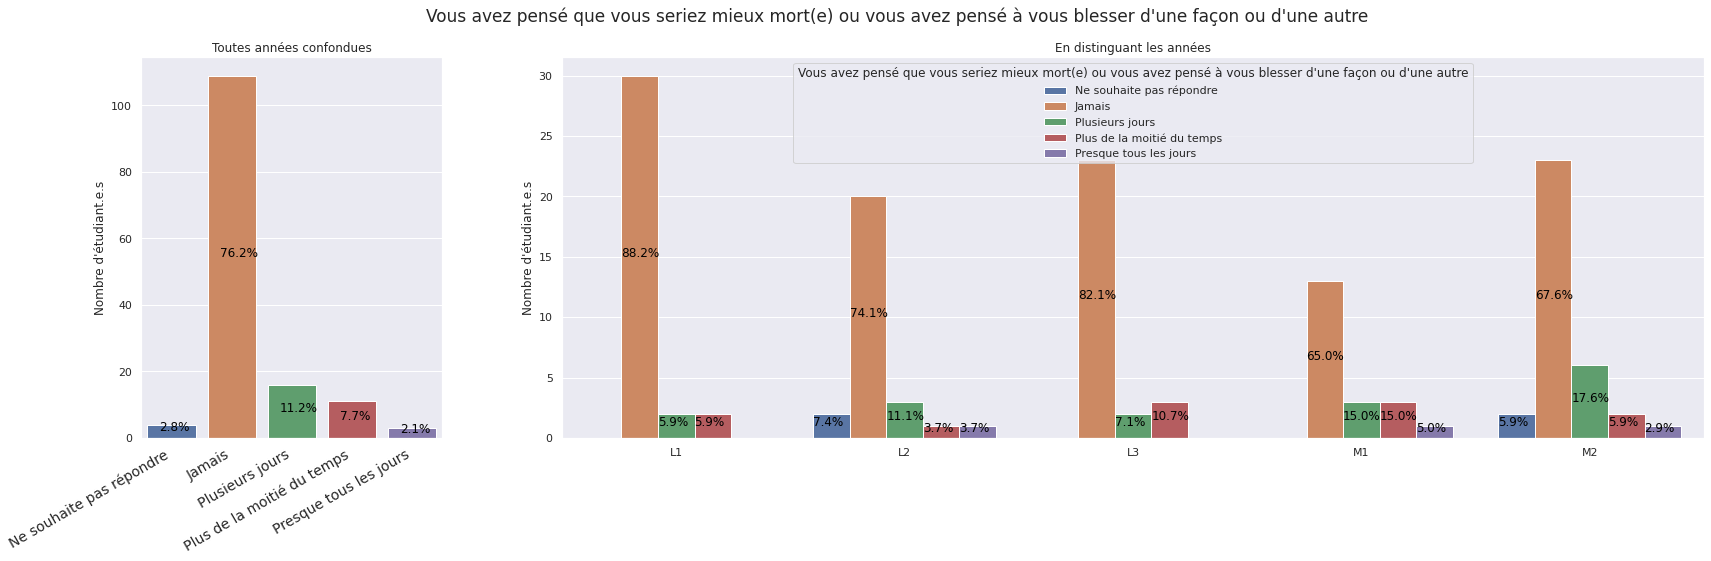

In [14]:
for i in qIpsosDepr :
    plot_both(i, "En quelle année êtes-vous ?" )

#### Isolement

À la question " _Vous sentez-vous isolé(e) socialement ?_ ", nous avons eu les résultats suivants.

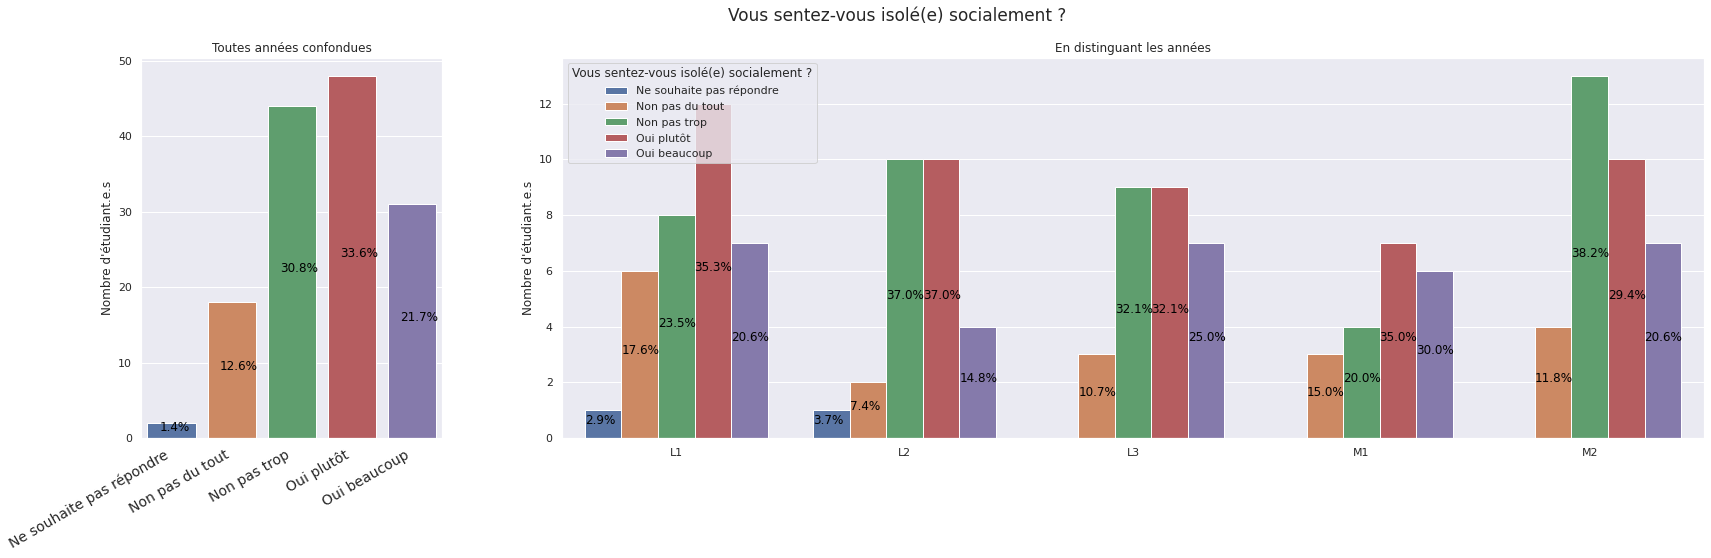

In [15]:
plot_both("Vous sentez-vous isolé(e) socialement ?", "En quelle année êtes-vous ?")

### Conditions d'enseignement

Nous avons demandé aux étudiant.e.s d'attribuer une note de 1 à 5 à leur épanouissement dans leurs études, 1 correspondant à __Pas du tout__ et 5 à __Très fortement__ 

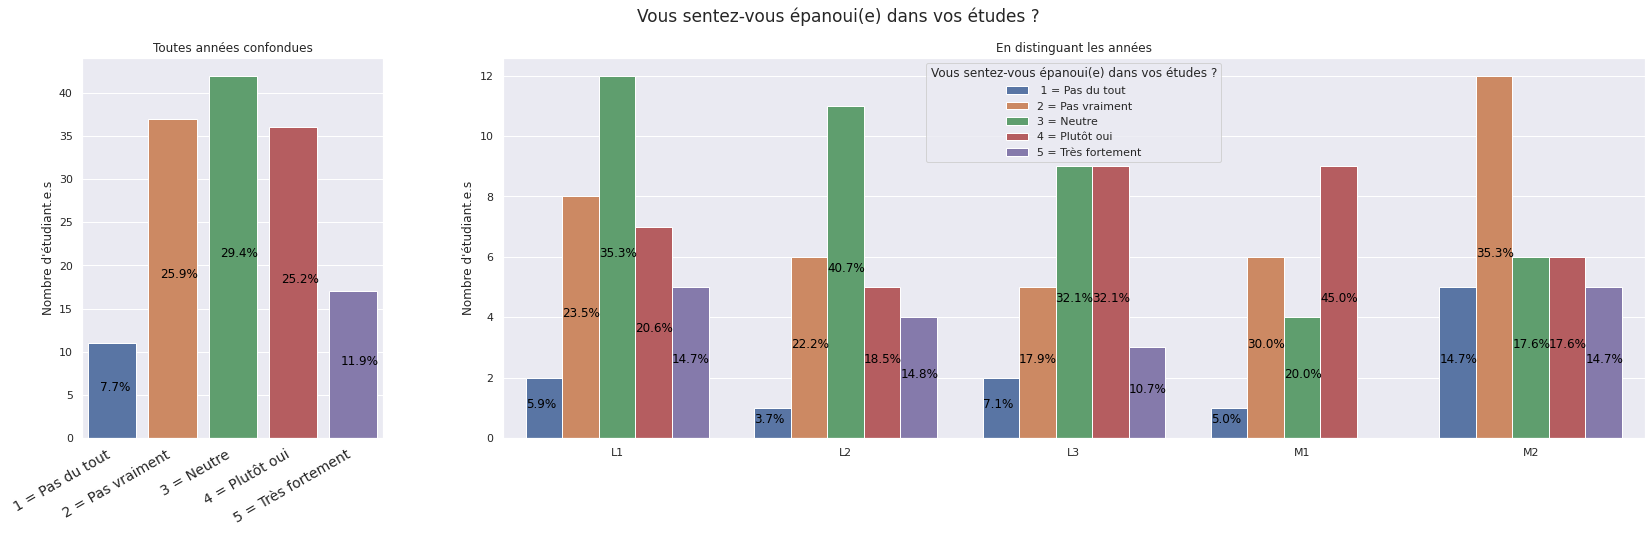

In [16]:
plot_both("Vous sentez-vous épanoui(e) dans vos études ?","En quelle année êtes-vous ?")


Nous leur avons demandé s'ils ou elles avaient ressenti une baisse de motivation au cours des derniers mois, et si ils ou elles avaient eu envie d'arréter leurs études.

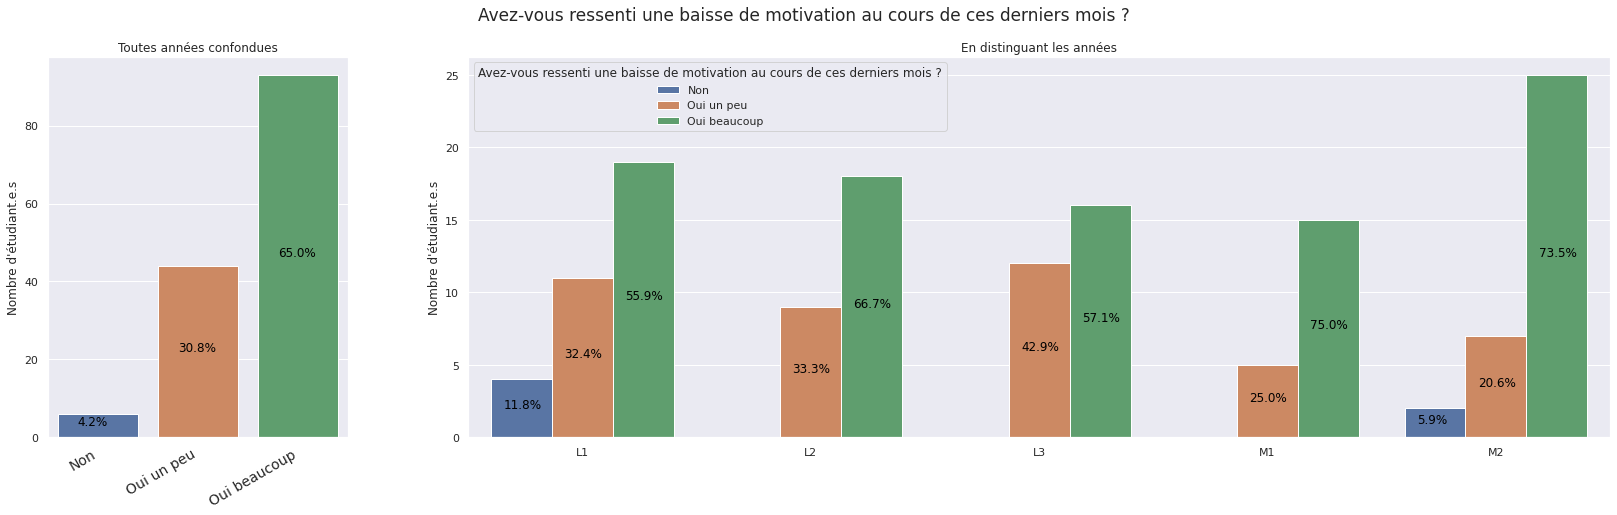

In [17]:
plot_both("Avez-vous ressenti une baisse de motivation au cours de ces derniers mois ?", "En quelle année êtes-vous ?")

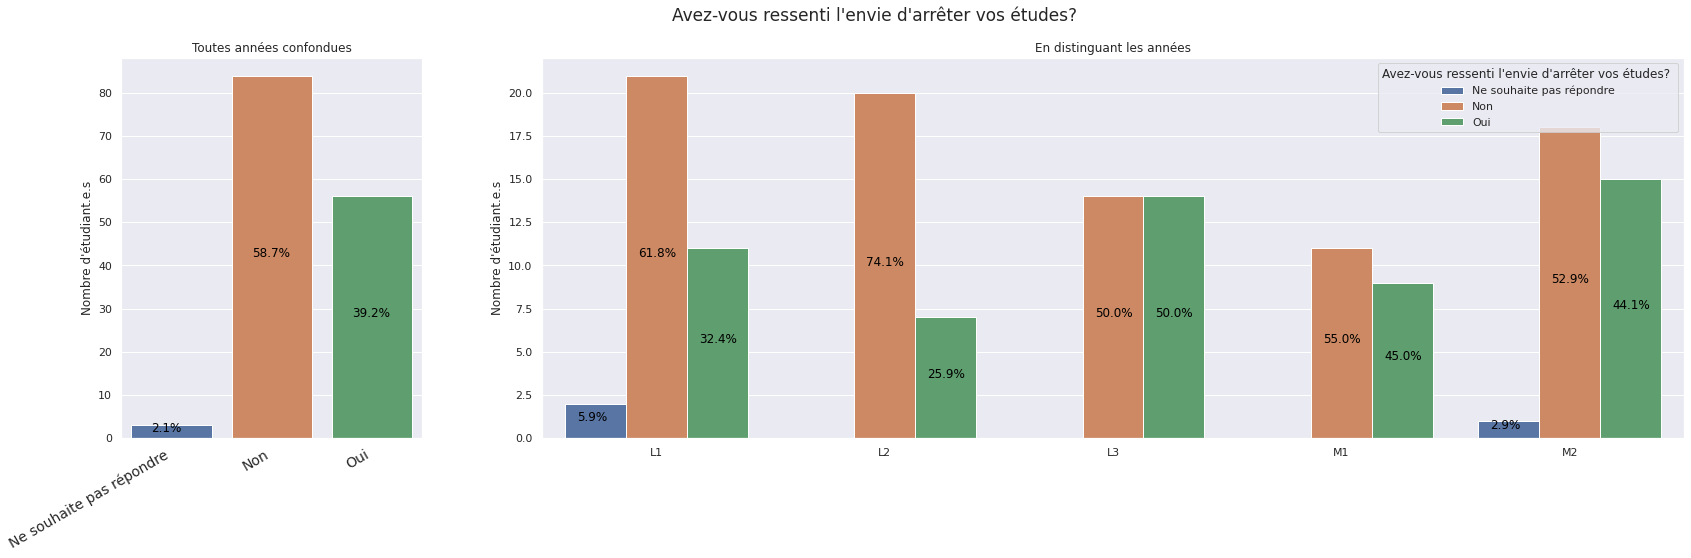

In [18]:
plot_both("Avez-vous ressenti l'envie d'arrêter vos études? ", "En quelle année êtes-vous ?")


Il est à noter que les étudiantes ont plus ressenti l'envie d'arrêter leurs études que la moyenne : 50% contre 33,3% chez les étudiants ou 33.3% chez les étudiant.e.s non binaire.

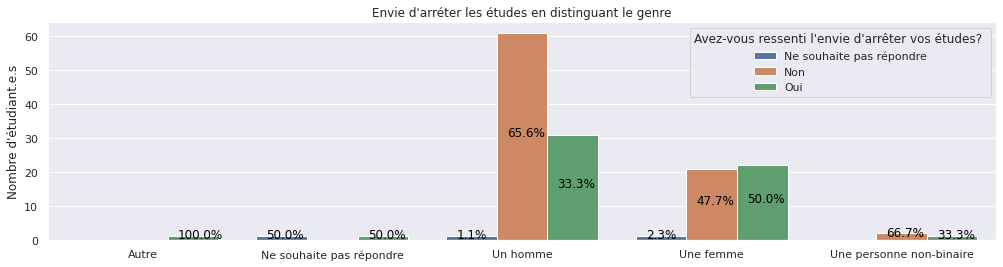

In [19]:
plt.figure(figsize=(17,4))
plot = sns.countplot(x="Vous êtes ", hue="Avez-vous ressenti l'envie d'arrêter vos études? ", data=data)
perc_hue(plot, "Vous êtes ", "Avez-vous ressenti l'envie d'arrêter vos études? ")
plot.set_xlabel("")
plot.set_ylabel("Nombre d'étudiant.e.s")
plot.set_title("Envie d'arréter les études en distinguant le genre")
plt.show()

Nous avons également voulu prendre le ressenti des étudiant.e.s sur les modalités d'enseignements actuelles.

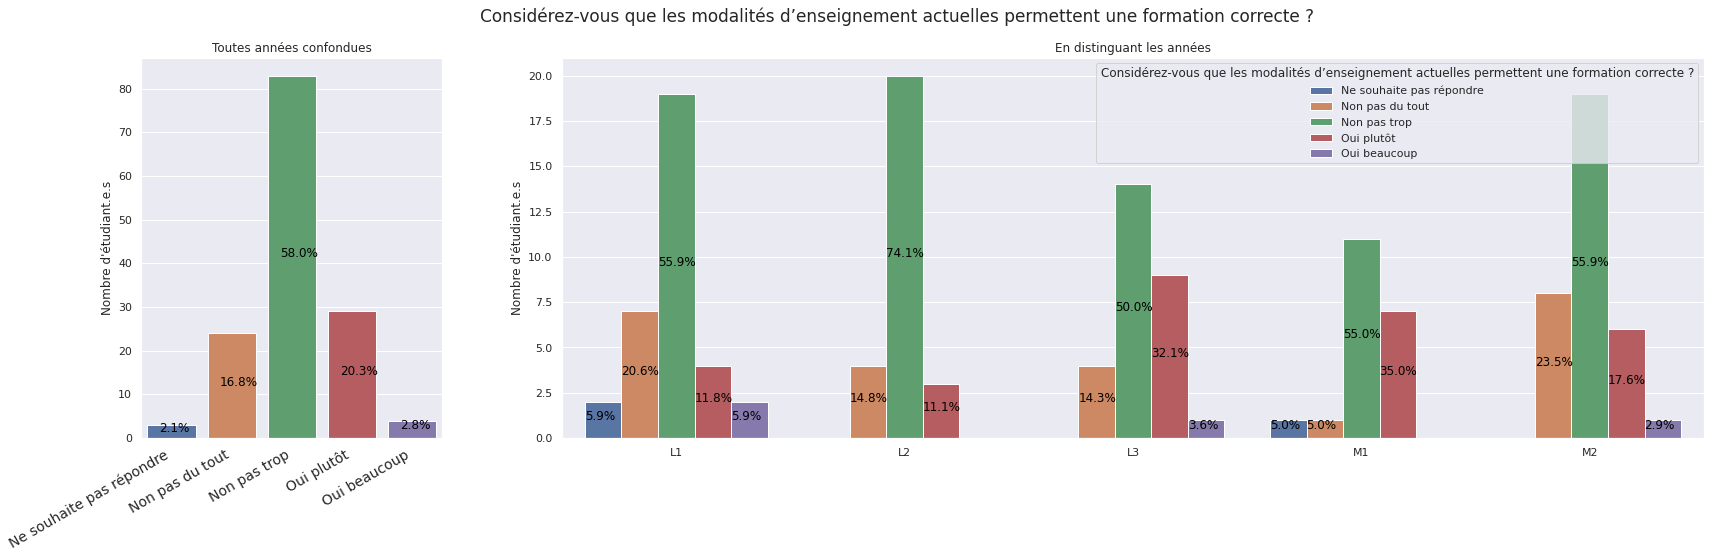

In [20]:
plot_both("Considérez-vous que les modalités d’enseignement actuelles permettent une formation correcte ?","En quelle année êtes-vous ?")


A la demande de certain.e.s enseignant.e.s, nous avons demandé l'avis des étudiant.e.s sur le retour au présentiel, et à la possibilité pour eux et elles de se rendre en présentiel. Emmanuel Macron  avait en effet annoncé _"Un étudiant doit avoir les mêmes droits qu'un salarié (...) S'il en a besoin, il doit pouvoir revenir à l'université un jour par semaine"_

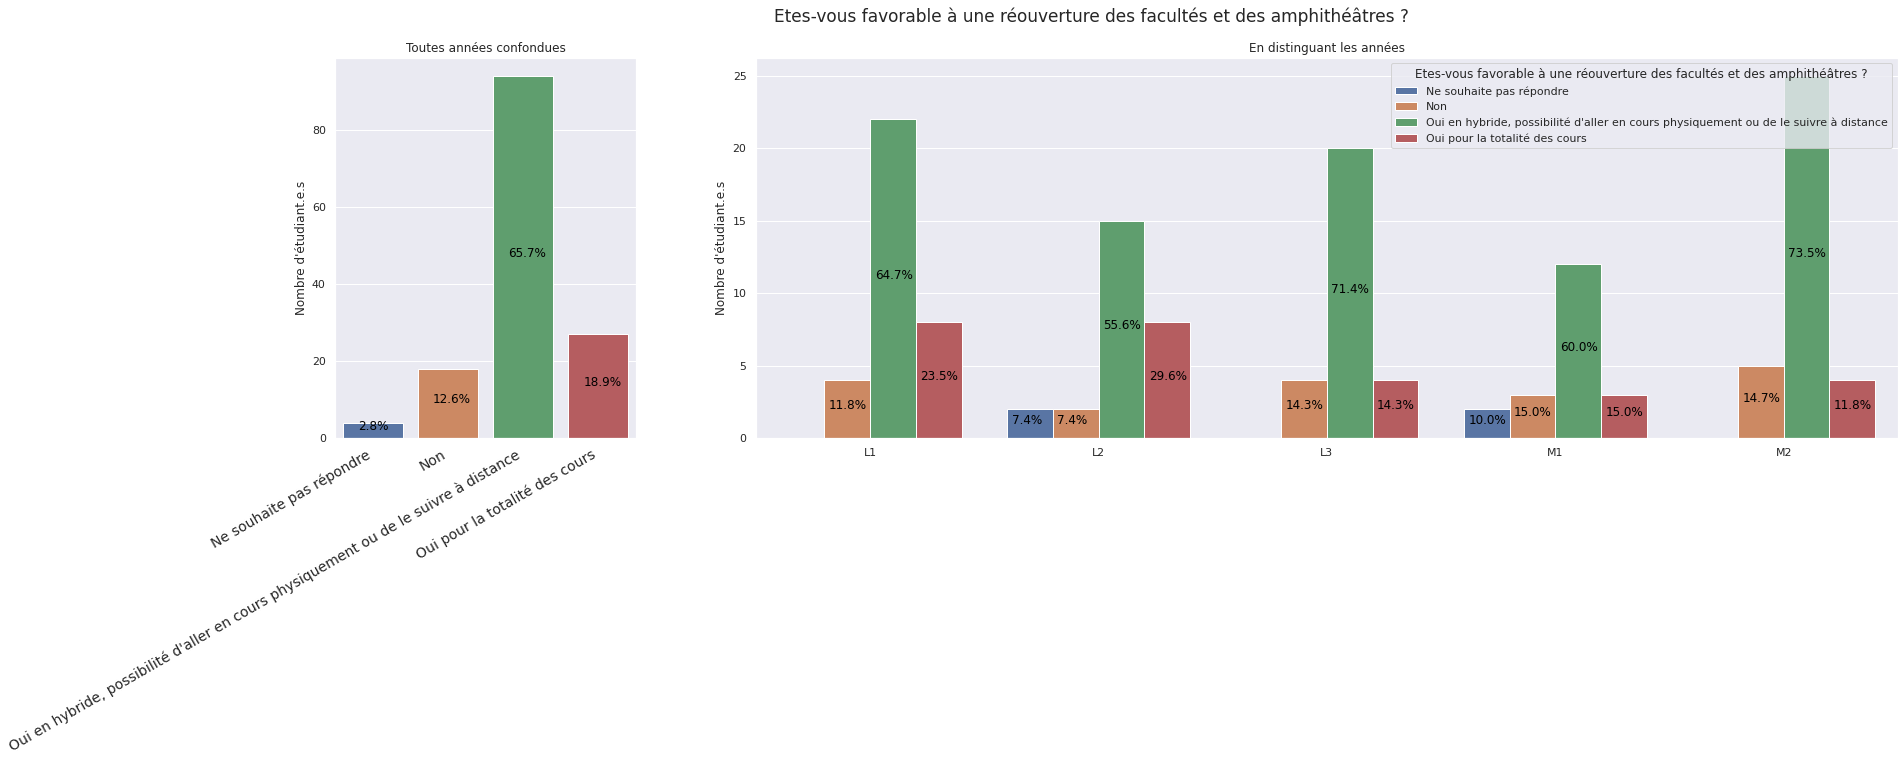

In [21]:
plot_both("Etes-vous favorable à une réouverture des facultés et des amphithéâtres ?", "En quelle année êtes-vous ?")


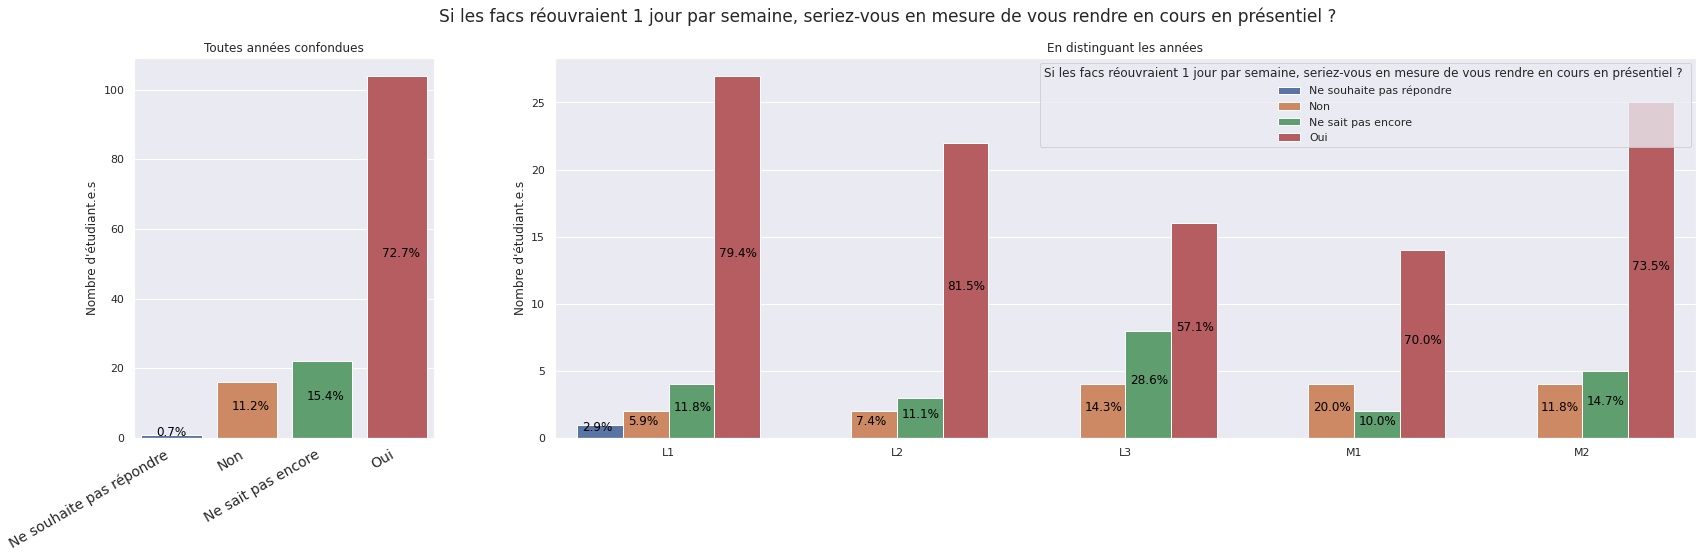

In [22]:
plot_both("Si les facs réouvraient 1 jour par semaine, seriez-vous en mesure de vous rendre en cours en présentiel ? ", "En quelle année êtes-vous ?")


### Précarité

Nous avons aussi voulu nous renseigner sur la situation de chacun.e, la situation sanitaire ayant fragilisé de nombreux et nombreuses étudiant.e.s.

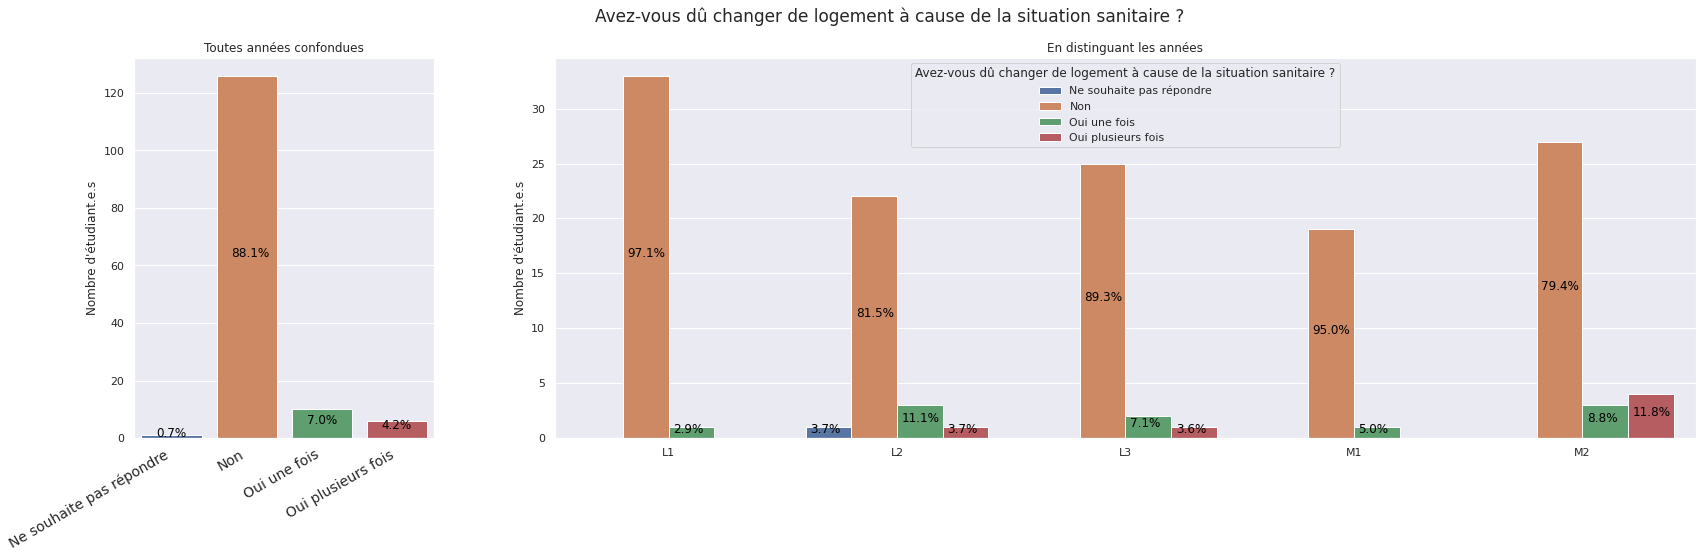

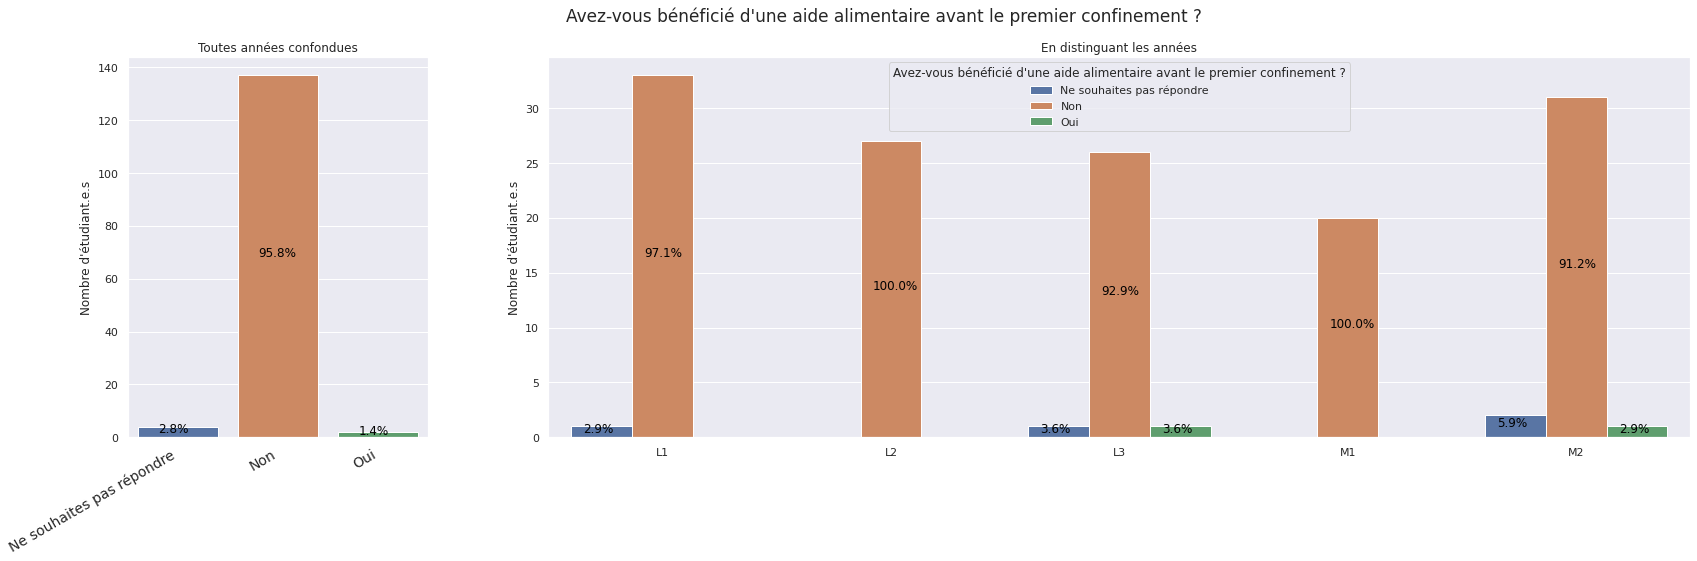

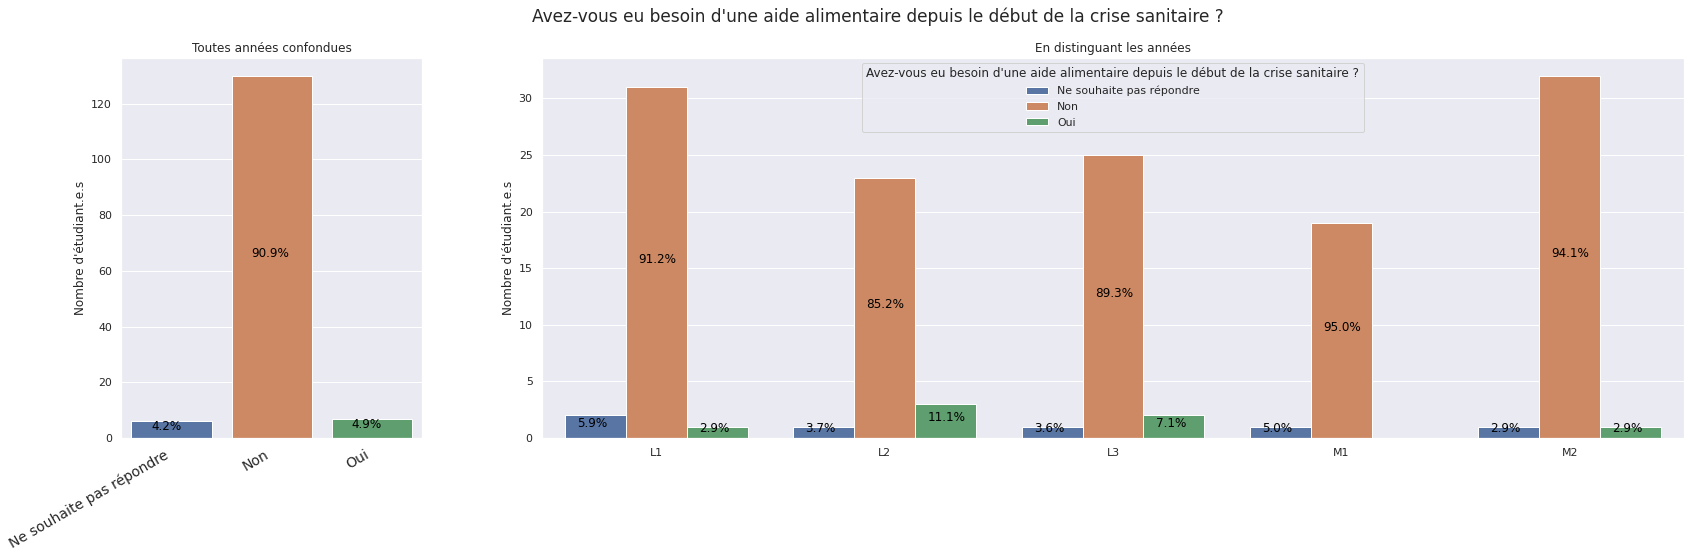

In [23]:
qPrecarite = ["Avez-vous dû changer de logement à cause de la situation sanitaire ?",
       "Avez-vous bénéficié d'une aide alimentaire avant le premier confinement ?",
       "Avez-vous eu besoin d'une aide alimentaire depuis le début de la crise sanitaire ?"]

for i in qPrecarite : 
    plot_both(i, "En quelle année êtes-vous ?")

Des commentaires textuels ont été laissés concernant le logement, ils suivront dans la partie __Retours textuels__.

### Trouver de l'aide

Face aux nombreux retours témoignant du grand nombre d'étudiant.e.s souffrant de troubles anxieux, dépressifs et/ou étant peu épanoui.e.s dans leurs études, nous avons trouvé intéressant de demander si certain.e.s avait consulté, et si chacun.e avait connaissance des ressources auxquelles s'adresser en cas de besoin.

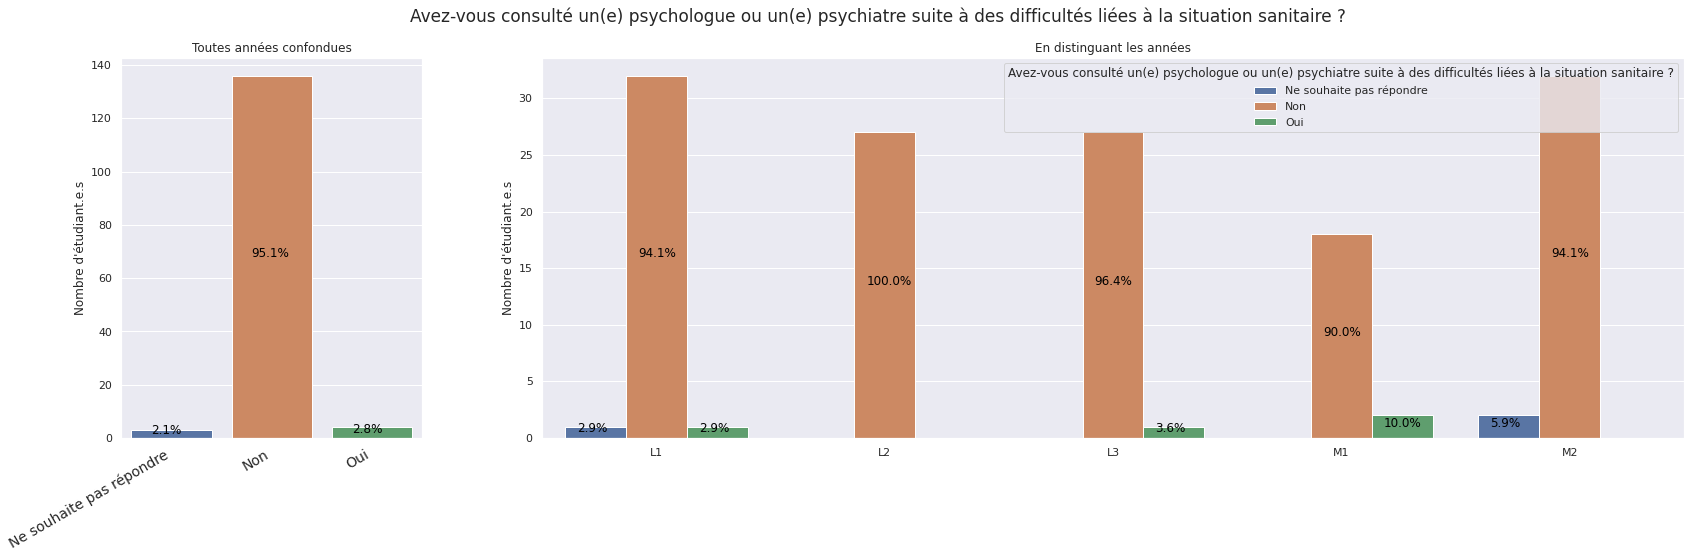

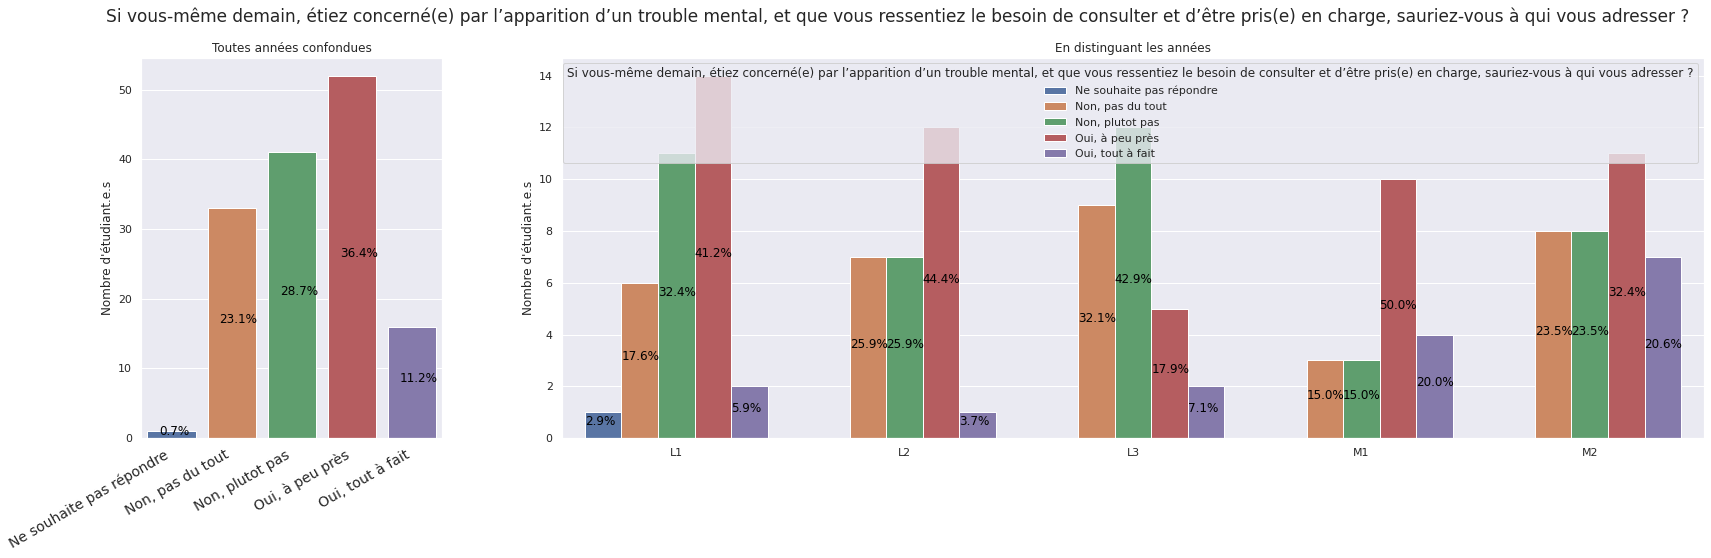

In [24]:
qAide = ["Avez-vous consulté un(e) psychologue ou un(e) psychiatre suite à des difficultés liées à la situation sanitaire ?",
"Si vous-même demain, étiez concerné(e) par l’apparition d’un trouble mental, et que vous ressentiez le besoin de consulter et d’être pris(e) en charge, sauriez-vous à qui vous adresser ?"]

for i in qAide : 
    plot_both(i, "En quelle année êtes-vous ?")

Il apparaît clairement que la majorité des étudiant.e.s ne savent pas forcément à qui s'adresser, ce qui a surement une incidence dans le faible nombre de consultations recueillies.

### Pour finir

Nous souhaitons finir les graphiques avec celui correspondant à la question suivante : _Selon vous, le bien-être des étudiant(e)s est-il mis de côté ?_


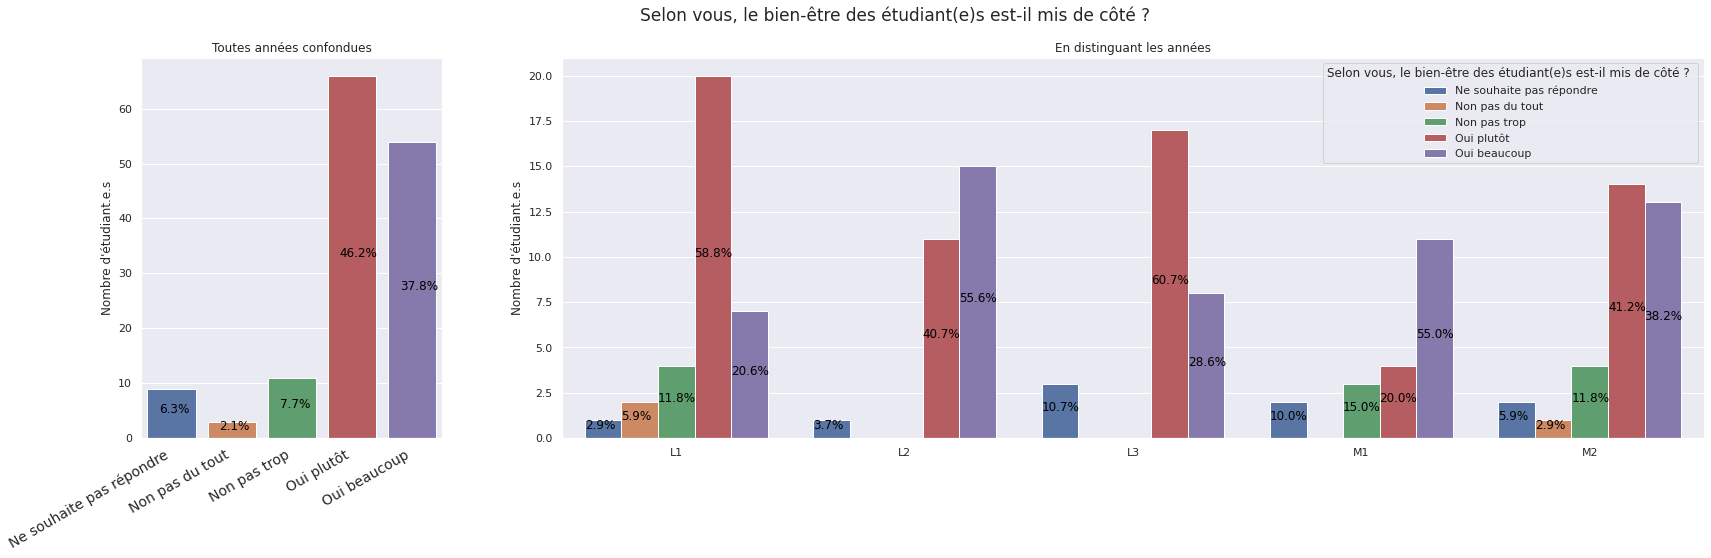

In [25]:
plot_both("Selon vous, le bien-être des étudiant(e)s est-il mis de côté ? ","En quelle année êtes-vous ?")

## Retours textuels

Voici les commentaires laissés par les étudiant.e.s, laissés tel quel.

In [26]:
labels_text = ["Des remarques par rapport aux méthodes d'enseignement actuelles ?",
    "Des pistes pour l'amélioration des méthodes d'enseignement ?",
    "Vous pouvez nous écrire un témoignage concernant votre logement ici",
    "Si vous souhaitez nous laisser un petit mot ou témoigner de votre situation pour que l'on puisse le remonter aux enseignant(e)s, c'est ici :"]

In [27]:
from termcolor import colored

pd.set_option('display.max_colwidth', None)
md = ''
for i in labels_text :
    md += '## <span style="color:red">{}</span>'.format(i)
    md += '\n * '
    md += '\n \n * '.join([str(x) for x in data[i].dropna().values ])
    md += '\n'
    md += '\n'
        
display(Markdown(md))

## <span style="color:red">Des remarques par rapport aux méthodes d'enseignement actuelles ?</span>
 * Les professeurs de TD/TP particulièrement ont fait beaucoup d'effort pour qu'on puisse suivre sereinement nos cours via discord. Pour les professeurs d'amphi ils restent malgré tout parfois un peu fermé à nos requêtes
 
 * Les journées sont parfois très longues, et nous n'avons pas de pause car les enseignants dépassent de leurs horaires. Il est difficile de manger le midi, et quasi impossible de ne serait-ce qu'aller aux toilettes entre deux cours.
 
 * Absence de réels communication entre les professeurs et les élèves

 
 * Gros manque de communication, des profs qui nous donnent 0 nouvelle et une charge de travail toujours aussi importante 
 
 * Il faut garder les Tp/TD en presentiel, mais faut faire attention à ce que l'on ai pas des cours à distance et sur place dans la même journée. 
 
 * J'ai l'impression de recevoir trop d'informations à traiter lors des amphis. Les cours vont  trop vites et on n'a pas le temps de comprendre ce qui est dit.
 
 * Je trouve qu'il est facile de se plaindre et que ce n'est pas facile, également pour les professeurs. Cependant je peux reprocher ce sont les cours "questions/réponses" qui ne sont pas souvent utiles.
De plus j'espère que contrairement au semestre dernier, la quantité de travail au niveau des projets sera plus petit. Je travail 30/35h par semaine en plus des cours et c'est compliquer de jongler 5 projets en même temps, même pour mes camarades qui ne travaillent pas.

 
 * Merci à l’enseignante qui n’aura jamais répondu aux e-mails malgré plusieurs envoies a plusieurs adresses.
 
 * C'est assez alétoire, ça dépend du profs et de leur volontés à continuer de nous donner des enseignements de qualité. Mais essayer de vouloir continuer à faire cours comme avant avec des cm/td en distanciel ça ne fonctionne pas. Les élèves perdus sont justes perdus. Après certains enseignants essayent bien de nous faire participer mais c'est aussi compliquer quand ils ont un mur en face.
 
 * Du stress est rajouté aux étudiants en modifiant illégalement les MCC en plein milieu d'année. je pense surtout au M2 dont on a "interdit" l'accès à certaines matières dont des fondamentales de parcours. En nous faisant passer pour des enfants en nous disant que les profs savent mieux ce qui est bon pour nous que nous. En continuant stupidement les cours comme si de rien n'était en laissant la charge de travail la même voire en l'augmentant. Ils se plaignent des difficultés qu'ils. ont avec la crise sanitaire mais ce ne sont pas les seuls. Nous aussi c'est difficile. Mais nous on sait que c'est difficile pour tout le monde. Eux non.
 
 * tout dépend des professeurs, pour le coup c'est un petit peu au petit bonheur la chance. Si vous tombez sur un professeur investi vous maitriserez facilement la matière à contrario un professeur qui délaisserait ses élèves et puis c'est l'incompréhension totale et puis petit à petit le dégout de la matière  
 
 * Certains profs ne mettent rien en place de special, on a limite l'impression qu'ils sont en vacances. Et certaines solutions ne sont vraiment pas adaptées comme les "questions/reponses". Apres certains profs ont quand meme fait beaucoup d'efforts comme des videos etc.
 
 * J'ai pris pas mal de temps à être au courant que les enseignements se poursuivait en ligne durant les semestres passé (beaucoup plus au 2nd semestre de L1 qu'au 1er semestre de L2) et ça a fait que j'ai fini avec une charge de travail beaucoup trop importante a quelque semaines avant les examens.
 
 * Je ne sais pas quel être humain normalement constitué est capable de suivre un cours de 16h à 19h, face à un écran où défile un powerpoint sur un fond de voix monotone. Un an de distanciel et aucune adaptation de la part de la fac et des enseignants. Aucune interactivité, impossible de rester concentré.
 
 * Moins d’interaction qu'en présentiel, peu "attractif" (simple lecture des slides, lecture du sujet de TD/TP puis plus de parole pendant le reste du cours). Cela dépend après du professeur évidement. Mais le semestre dernier avec mes profs de TD/TP étaient assez difficile à suivre en distanciel
 
 * Distanciel
 
 * Je trouves que tout dépend de l'organisation du professeur : dans certaines matières, le suivi continu, les cours sont corrects et les professeurs s'adapte assez bien aux outils de communications. En revanche, dans d'autres cours, certains professeurs ne font quasiment plus cours du tout, ils ne proposent pas de cours en visio, ni de vidéo, ni même de vrai poly de cours... 
 
 * Tous les professeurs ne sont pas coopératifs vis-à-vis de l'enregistrement des cours, certains trouvent cela inutile, même pour les élèves ayant des difficultés à suivre le cours au moment où celui-ci a lieu.
 
 * Y'a des profs biens qui font des cours interactifs et intéressants : ex avec des quizz, des tablettes pour écrire comme au tableau... et c'est cool
Y'en a qui ne font que lire leurs slides et c'est affreux, encore plus quand leur connection est pourrie
 
 * Les étudiant(e)s sont isolé(e)s et livré(e)s à eux/elles-mêmes tous les jours. Le sentiment de solitude est omniprésent et il est difficile de se concentrer sur autre chose, surtout lorsque les cours sont en distanciel. 
Ces derniers sont pour la plupart assez mal gérés, à la fois pour les professeur(e)s et les étudiant(e)s. Il est difficile de concilier un environnement calme de travail avec des appareils qui fonctionnent et de rester concentré(e) pendant les 2h complètes, d’autant plus lorsqu’il y a des journées avec plus de 8h de CM d’affilé en visioconférence. De plus, il nous arrive fréquemment de découvrir des devoirs à rendre ou des examens sur moodle sans êtres prévenu(e)s directement par les enseignants. 
Enfin, nous obtenons toutes les informations bien trop tard... Entre les changements d’emplois du temps et la dualité distanciel/présentiel, nous sommes prévenus au mieux, 2 jours avant le dit cours, au pire, la veille au soir.
Ce caractère imprévisible est très mal vécu par l’ensemble des étudiant(e)s.
 
 * très difficile de suivre les cours de mathématiques à distance, mais pour le reste c'est plutôt bien.
 
 * Tout ce que je sais, c'est que l'UFR d'info fait vraiment de son mieux, et ce n'est pas si mal contrairement à d'autres UFR mais il ne faut pas nier que les étudiants ne sont pas dans les meilleurs conditions et nous avons des doutes sur si nous avons vraiment acquis les compétences.
Honnêtement je ne sais pas si on peut faire mieux logistiquement en distanciel...
 
 * Je sais que les cours à la fac sont censés être moins encadrés, mais là on dirait presqu'on ne l'est pas du tout.
 
 * Le distanciel c'est bien pour ma part ça m'évite de perdre deux heures de travaille (en allant à la fac et retournant chez moi), mais je trouve que les cours sont lent et qu'il manque de documentation, de préparation, notamment pour les td par exemple le prof pourrait préparer un pdf que l'on pourrai voir pendant le cours (ce qui est vraiment plus simple que d'écrire sur un "whiteboard" durant le cours)
 
 * Les méthodes universitaires en général sont déjà plutôt médiocres je trouve (amphis inutiles car beaucoup d'informations à assimiler mais avec une pratique en TP décalée/insuffisante/pas assez encadrée/à la va vite/tardive entraînant oublis...) mais avec le distantiel c'est encore plus complexe pour tout le monde, les cours sont parfois condensés et donc le débit d'information est encore plus élevé et avec une pratique encore plus mauvaise car pas dans de bonnes conditions chez nous ou bien pédagogiquement parlant mauvaise (bien entendu c'est difficile pour tout le monde et ce dernier point ne vise personne à part le virus bien sûr)
 
 * On sent un effort côté enseignants, plus d'intérêt pour nous, mais personnellement je ne pense pas qu'ils puissent y faire grand chose. Je pense qu'un retour en présentiel est trop important. Je prefere prendre le risque d'être contaminé que de rester la fin de ma licence enfermé.
 
 * Certains prof ne font pas d'effort face a cette situation 
 
 * Peu d'intercation.
 
 * Je ne pense pas que mettre des matieres en notation 100% exam (protocoles réseau) soit souhaitable.
 
 * Problème de stabilité au niveau des mesurés prises par le gouvernement
 
 * On a nos TD en presentiel et des amphis 30 minutes après la fin, j’ai la chance d’habiter Porte de Vitry mais presque personne n’est à l’aise avec tout ça...
 
 * les cours en distanciel sont fastidieux. Ils sont lents et on apprend pas grand chose.
 
 * C’est plutôt chiant d’avoir une partie des cours en présentiel et l’autre en distantiel car venir à la fac que pour deux heures ensuite se dépêcher de rentrer chez soi pour suivre le cours en ligne c’est casse couilles.
 
 * Contraintes de choix d'enseignements incohérent par rapport au domaine de formations. Modalités de validation tyrannique au vu de la période du cycle d'étude ( période de recherche active de stage).
Incompréhension du discours des responsable de d'enseignement et forte inactivité de ceux-ci dans la direction et l'organisation de leurs parcours d'enseignement. 
 
 * J'ai du mal à me concentrer, à assimiler mes cours avec cette méthode surtout par rapport aux bugs des plateformes qu'on utilise mais aussi car  je trouve ça démotivant de suivre les cours de chez moi
 
 * Certains enseignants semblent apprécier aussi peu que nous les cours à distances mais font des efforts indéniables.
 
 * Inadmissible 
 
 * Je pense que le problème ne vient pas tant que ça de l'enseignement en lui-même, parce qu'en soit on a toujours des profs qui nous font cours, à qui on peut poser des questions etc... C'est juste le format qui n'est pas le même et qui nous pénalise énormément, parce que rester chez soi H24 devant son PC à écouter les profs pour ensuite quand c'est fini, rester encore devant son PC pour travailler ces cours / faire des TP / projets c'est très usant. Mentalement c'est éprouvant, de ne pas pouvoir s'aérer, parler avec ses amis ou autres pour pouvoir extérioriser. Sinon pour en revenir à l'enseignement je pense que c'est propre à chaque professeur et à ses méthodes de travail. Personnellement, tous mes profs ont bien réussi à s'adapter et nous produisent des cours de qualité.
 
 * Faut tout changer !
 
 * Elles s'adaptent tant bien que mal, je pense que le problème est surtout dans l'adaptation côté étudiant.
 
 * Au dela de 2h de cours, c'est juste pas possible de rester concentré
 
 * On a deux fois plus de travail (lire le chapitre + vidéo 2h, cours q/r 2h, travail personnel)
 
 * Surcharge de projets et travails surement du au fait que les profs pensent que nous ne faisont rien chez nous. Mais moi je vis seul en appartement j'ai toutes les tâches ménagères à faire encore plus qu'au quotidien normal de quand je vais a l'université. 
 
 * Motivation quasi-inexistante lors des cours en distanciel, contrairement aux rares cours en présentiel qui remotivent grandement.

## <span style="color:red">Des pistes pour l'amélioration des méthodes d'enseignement ?</span>
 * Les profs devraient faire plus de sondage pour nous demander du feedback sur leur cours 
 
 * La reprise des cours en présentiel, pour ceux qui le souhaitent.
 
 * Avoir un lieu où l'on peut se faire aider sur ses DM/projets perso (Channel discord ou autre) et aussi avoir les profs dans ce Channel pour qu'il puisse se rendre compte si leur cours son compris ou non. 
 
 * Des cours plus structuré et des petites pauses d'une ou deux minutes entre chaque partie importante pour facilite la compréhension
 
 * Pas vraiment, nous sommes tous prit et contraints par la situation.
Le mieux a faire est d'apporter du soutien à celles et ceux qui en ont besoins!
 
 * OUI : Imposer un délai pour rendre les copies/notes/réponses aux mails
 
 * Eviter de laisser partir tous les bons enseignants et de nous donner des enseignants qui ne veulent pas faire cours.
 
 * Commencer par apprendre à enseigner. A savoir que l'enseignement ce n'est pas que le bon déroulement d'un cours mais aussi être à l'écoute des étudiants.
 
 * Une meilleure communication et une meilleure maitrise des outils (Discord/Zoom), des cours avec plus de schémas et pas simplement des slides à s'endormir au bout de 10 minutes, de l'interaction avec les élèves pour certains cours.
 
 * Avoir des profs plus presents qui nous explique vraiment les choses plutot que de juste repondre a 2/3 questions de temps en temps. Et des corrections pour au moins comprendre ce qui nous etait demandé.
 
 * De bons progrès ont déjà été fait. J'aimerais que la communication entre élèves soit beaucoup plus facilité. Beaucoup d'élèves (comme moi avant que je rejoigne les serveurs discord) sont surement dans leur coin et n'ont pas un cercle de contact au sein de l'université et les laisser comme ça peut grandement jouer au niveau de leur motivation. Mettre en avant les serveurs discord des filières serait une bonne idée.
 
 * Nous obliger à mettre les cameras et les micro (je pense que c'est vraiment indispensable).
Mettre en place des solutions interactives comme des quiz (pas des quiz sur word à rendre à la fin, des questions au fur à mesure du cours, on pourrait cliquer directement sur l'ecran, il y a des plugins pour ça, comme sur twitch) qui nous pousseraient à suivre.
Eviter de nous balancer des slides et les lire pendant 15min. On sait lire.
 
 * Que l'ensemble de informations soient transmises à l'ensemble des étudiants concernés via les vois officielles et non de manière informelle à un sous-ensemble des-dits étudiants.

Que les liens vers les conférences en lignes soient toujours disponibles sur Moodle et non que l'on aie à les chercher dans des recoins obscurs de l'Internet (C'est déjà le cas pour la majorité des cours, mais il y a des instances où ce n'est toujours pas le cas)
 
 * Cours plus interactif : sondage sur zoom, activité sur kahoot (en CM de AAL [L2], on avait droit à des qcm de fin de séance pour revoir les points abordés, avec des explications sur les erreurs fréquentes)

Cours plus attractives : des schémas sur diapositive, petits exercices (comme kahoot déjà cité) entre deux notions pour améliorer la participation (même TD/TP). Les exercices de TP en même temps que le prof : on lit les énoncés, les élèves proposent leur idée, puis on explique les fautes.

Mettre les diapositives avant le CM : cela pourrait permettre aux élèves s'approprier le cours avant le CM, puis de poser des questions (c'est un format que l'on adopté dans certains cours de Japonais), puis comme proposé plus haut, avoir des mini-exercice, on peut aussi l'appliquer pour les TD. De plus, avec les soucis de connexion, venant d'élèves comme de professeur, avoir le cours déjà en tête plutôt que de le découvrir avec la moitié des mots avalée par la mauvaise connexion serait un peu plus bénéfique.


 
 * Presentiel
 
 * Permettre aux élèves de connaître leur notes pour situer leur niveau dans les matières (et ne pas avoir à attendre 3/4 mois pour recevoir les résultats d'un partiel...) 
Publier les slides des cours si il y en a (ou mieux :  des vidéos, des rediffusions de cours en lignes) 
Pour les TP : donner les corrections (si possible, pas seulement oralement, car un peu compliqué quand c'est du code par exemple) 
 
 * Le microoooo !! Faut que la fac achète des micros à ses enseignants svp svp !! C’est énervant et j’arrive pas à suivre correctement it disturbs me 
 
 * Adapter la difficulté et le nombre de projets, DM et contrôles, et mieux les répartir sur l'année afin de ne pas nous surcharger de travail au moment des exams.
 
 * Pas assez d'enseignants enregistrent et mettent à disposition les cours pour que chacun puisse quand il le peut suivre. 
 
 * Faire des pauses (pas 2 heures en distanciel sans pause); faire des quizzs au milieu, faire gaffe à avoir une bonne connection si possible, bien communiquer par mail ou discord pour que les étudiants sachent ce qu'il se passe.
 
 * - Privilégier les cours en direct ou des créneaux dits de « FAQ » (sur discord par exemple) afin de favoriser l’échange direct entre les enseignant(e)s et les étudiant(e)s qui sont jusque maintenant, obligé(e)s d’échanger mails sur mails. 
- Éventuellement, augmenter les travaux de groupe ou les discussions entre étudiant(e),s afin d’éviter l’isolement et les éventuels décrochages scolaires
- Prévenir directement sur boîte mail étudiante l’ajout de devoirs ou d’examens
- Instaurer des pauses entre les visioconférences (les 15 minutes déjà accordées correspondent en réalité à 5 min car les enseignant(e)s débordent souvent sur leurs horaires)
- Obtenir les informations relatives aux changements d’emploi du temps, en temps et en heure (même lorsque les informations peuvent changer du tout au tout) car certain(e)s d’entre nous doivent prévoir le déplacement jusqu’en région parisienne. 
 
 * pour certains, mettre les pdfs ou les slides du cours serait vraiment un plus, on a parfois pas le choix de louper un cours, et c'est assez difficile de rattraper.
 
 * Je n'ai pas d'idée, j'ai juste l'impression que nbous devons faire plus avec les vidéos pour s'en sortir.
 
 * La reprise du présentiel dans la mesure du possible, et plus de dispositifs pour "motiver" à travailler comme des exercices en ligne (pas forcément noté et sur la base du volontariat).

 
 * Voir ci-dessus
 
 * C'est compliqué malheureusement, personnellement chez moi c'est très difficile d'être vraiment concentré je préférerai du présentiel pour être concentré parfaitement sur le travail mais bien sûr c'est probablement impossible. Au mieux il faudrait au moins améliorer l'encadrement en TD/TP je pense.
 
 * Nous avons eu un cours d'un professeur qui était à la fac (il pensait en fait que le cours était en présentiel). 
Ca m'a donné l'idée qu'on pourrait faire un système comme "les personnes volontaires vont à la fac pour les cours (avec une attestation spéciale (comme dans les lycées en fait simplement) qui dit de quelle heure à quelle heure on peut y aller ?
Si il faut plus, on peut faire un système d'inscriptions aux cours avec une limite présentielle. 
Exemple : Pour les cours de la semaine on s'inscrit, le week-end, à 4 cours max ou simplement à une journée par semaine. Premier arrivé premier servi. Ca permettrait de limiter les inscriptions et donc savoir combien de personnes sont au cours (et qui au passage). On limite ainsi les clusters et on permet un minimum de social/bon enseignement. Ca permet aussi de choisir les cours où on est en difficulté par exemple.
Je pense que ce système est largement faisable. Il faut juste de l'organisation.
(après je ne dit pas non à une ouverture totale de la fac)
 
 * Faire des cours plus interactif avec par exemples des sondages, questions destiné à une seule personne en TD (sans pression en cas de non réponse bien sûr)
 
 * Il est nécessaire que certains professeurs fassent un plus grand effort de communication et d'interaction avec les eleves, surtout pendant les td et tp, afin de soliciter les élèves a participer et donc mieux suivre
 
 * les vidéos capsules sont mieux que les vidéos en direct. On peut apprendre à notre rythme (plus vite ou moins vite).
 
 * Retravailler sur l’emploi du temps des l1.
 
 * Avoir des référents d'enseignement spécifique à leurs fonctions de référents, qui n'ont pas une cinquantaine de rôle au sein de leur UFR. De sorte qu'ils ne puissent pas se terrer dérrières des activités tierces pour s'excuser de leur manque d'implication sur d'autres.
Par rapport aux méthodes d'enseignements en tant que telles, la surcharge hebdomadaire de travail suite à l'apparition miraculeuse du Contrôle Continue (uniquement dû au contexte sanitaire) est totalement mal gérée et efface de manière unilatérale le temps temps d'accès à toutes activités extra-scolaire ou autre.
 
 * Garder un minimum de cours en présentiel, favoriser le travail en équipe pour garder un lien social avec les autres.
 
 * Le retour en présentiel !
 
 * Plus, voir que des vidéos 
 
 * Pourquoi pas, lorsque c'est possible, dédier chaque jour à une matière ? De manière à aider l'organisation des étudiants…
 
 * Des pauses réelles de 15 min et pas 5 et demi à la volée, poser des questions aux etudiants, nous envoyer des mails à tous et pas à des sous ensembles d'etudiants qui ne transmettent pas forcément les informations. Nous donner nos notes en temps et en heure, on est déjà suffisamment angoissé.es comme ca pour en plus rester des mois sans nouvelles de nos résultats. 
Proposer des rendez vous en petits groupes en présentiels éventuellement.
 Je sais qu'une grande partie des enseignants font de leur mieux, mais j'aimerai beaucoup plus de transparence de leur part, et des deadlines claires et précises. Et pour certains profs qui ne savent toujours pas utiliser zoom ou BBB, ca fait maintenant un an qu'on en est réduit à ca, c'est incroyable de ne toujours pas savoir utiliser ces outils quand vous avez des collègues dans le bureau d'à côté qui savent le faire. Faites vous des petits groupes de cours si vous n'êtes pas à l'aise, parce que derrière on est entre 20 et 80 à en patir ... 
A ceux qui organisent des examens en présentiel et nous rabrouent le jour J parce que c'est déjà "intolérable d'organiser ca en pésentiel", ce n'est pas notre choix à nous, ça ne sert à rien de projeter vos angoisses sur nous. A ceux qui organisent des QCM en examens en présentiel, vraiment est ce la peine de nous faire venir pour ca ? Il faut adapter les modalités d'examen et les échelles temporelles pour les stages parce qu'on ne s'y retrouve vraiment pas . 
 
 * Faire participer tout le monde en posant des questions sur le cours par ex, des petits quizz.
 
 * Être plus raisonnable et traiter au cas par cas 
 
 * Plus de compréhension des profs face aux difficultés du distanciel. 

## <span style="color:red">Vous pouvez nous écrire un témoignage concernant votre logement ici</span>
 * Mes voisins du dessous regardent la télé fort à une heure du matin : un bonheur.
 
 * Impossible de se confiner dans 15m2
 
 * J’habite actuellement chez mes parents, je ne suis pas vraiment à plaindre contrairement à certains étudiants qui eux vivent seules
 
 * J'ai la chance d'habiter près de la Gare et de ne pas avoir un trajet trop long en train. Mais si il est plus agréable pour certaines personnes d'avoir cours à distance ça ne me dérange pas. 
 
 * Le seul espace de travail disponible chez moi et dans le couloir en face de la porte d'entrée de mon appartement, le seul lieux ou je peux être isolé pour écouter des cours et dans mon lit ce qui n'est pas adapté pour se concentrer. Le bruit de ma famille me gène souvent et je ne peux pas leur demander d'arrêter de vivre leur vie pour que je puisse écouter mes cours parce que nous avons tous les même problèmes.
 
 * Je vis seul dans mon appartement, je ne me plains pas car je vis bien la solitude. De plus mon appartement n'est pas trop petit et j'ai un balcon.
 
 * je vais tous les jours a la bibliothéque pour suivre mes cours car la ou j'habite je n'ai pas un espace de travail de plus le bibliothèques s ouvrent a 9h30 et ca m'arrive de commencer les cours a 8h30 donc je rate des  et encore je prend le risque de rentrer a 18h de payer une amande de 130e
 
 * c'est un 20 mètres carré, un bordel sans nom t je peux même pas y échapper. je suis bloquée chez moi pour travailler.
 
 * Colocation dans un appart assez petit mais avec chacune notre chambre, tres peu lumineux donc ca n'aide pas pour le moral...
 
 * Ça va, je fais partis des privilégiés.
 
 * Il y a bien souvent de gros travaux juste devant, ainsi que des fêtards qui malgré confinement et couvre-feu restent devant jusqu'à très tard ce qui m'empêche de dormir. 
 
 * Concernant certain(e)s de mes camarades, des déménagements pour prévenir les risques de contagion éventuelle ont été forcés impliquant alors leur isolement (et leur impuissance) face au contexte actuel. 
 
 * Un studio avec de la famille derrière.
 
 * J'ai dû rentrer a l'étranger chez ma famille car je n'ai pas pu trouver un job à cause de covid et je n'avais plus d'argent pour ma vie quotidienne en France
 
 * Logement familial aucun problème de ce côté personnellement 
 
 * Je suis dans un petit appartement et je suis très souvent enfermé dans ma chambre qui est du côté le moins lumineux de l'immeuble et c'est assez souvent peu agréable. Je profite de sortir un maximum, mais ce n'est pas toujours évident et la motivation n'y est pas non plus.
 
 * Dispute familiale fréquente durant les cours, rendant parfois impossible la participation oral
 
 * Je n’ai pas voulu changer de logement, j’ai eu suffisamment de mal cet été pour en trouver un
 
 * je vis avec mes parents.
 
 * grand appartement à Paris ou l'on vit à 6
 
 * Mon logement est familial, et je n'ai pas de quoi bien étudier (calme, bureau…).
 
 * Je vis comme beaucoup je pense dans un petit appartement très peu lumineux. Très chouette pour y passer mes soirées et mes weekends, moins chouette pour y vivre plusieurs mois coupés du monde. Pour preuve j'ai voulu prendre des plantes, seule une fougère à survécue, et elle est en piteux état tellement il fait sombre. J'ai du rentrer chez mes parents très loin de Paris pour ma santé mentale, et rentrer à Paris en catastrophe pour des examens dont on a eu le planning quelques jours avant pas merci pour le prix des billets. Avec le retour supposé du présentiel je ne peux même pas décider de retourner de nouveau chez mes parents, parce que je n'aurai pas les moyens de payer des billets aller retours indéfiniment. Dans tous les cas l'ambiance de travail n'est pas du tout idéale, et pour des raisons évident de santé j'évite de prendre les transports et donc de me rendre à la bibliothèque.
 
 * Je suis dans une résidence étudiante. Le soucis est que ma connexion internet n’était pas totalement en marche j’ai donc du retourne chez mes parents pour avoir une connexion stable. C’était très dure de se concentrer tout le temps
 
 * très difficile de travailler à la maison dans le bruit, le meilleur pour travailler est quand ils dorment tous, c'est-à-dire après 0h...
 
 * J'ai un problème de logement en parallèle de la crise du covid qui exacerbe le sentiment de solitude et d'enfermement que j'ai.

## <span style="color:red">Si vous souhaitez nous laisser un petit mot ou témoigner de votre situation pour que l'on puisse le remonter aux enseignant(e)s, c'est ici :</span>
 * Merci les cop.ine.ain.s : très bon formulaire ! Du courage et des bisous ! 
 
 * Les enseignant.e.s ont fait des efforts qui rendent les cours plus simple à suivre pour la plupart.
Par contre les responsables de master ou de pédagogie nous laissent dans un flou total. Ils nous ont demandé de nous inscrire sans nous mettre un délais particulier pour au bout de moins d'une semaine fermer les inscriptions sans prévenir, avant même qu'on puisse assister au cours pour se faire une idée.
Pendant les examens et les soutenances les enseignants se sont permis des familiarités et des injures à propos des étudiants, troublant le calme nécessaire pour faire un examen sans vraiment respecter les règles sanitaires (on se passait les copies entre étudiants, toucher nos cartes étudiantes, laisser les fenêtres fermées pour les soutenances, etc...) 
 
 * J'habite dans un deux pièces avec mon copain et ma fille de 6 mois. Je n'ai pas trouvé de mode de garde pour mon bébé jusqu'à très récemment, je n'ai eu aucun soutien de la fac, et il est difficile de suivre les cours toute la journée en distanciel en s'occupant en même temps d'un bébé.
Je viens d'être diagnostiquée avec une dépression et un trouble anxieux. La situation est difficile et les enseignants se montrent parfois peu compréhensifs.
 
 * Pas vraiment
Par rapport à la maquette de la licence cependant, ça serait bien d'avoir un projet INTER-UE obligatoires, par exemple pour ce semestre on aurait pu avoir un site à faire, utilisant une BDD, et proposant un service d'analyse grammaticale ? Ça serait toujours plus concret qu'avoir des projets à droite à gauche :/
Merci beaucoup à l'équipe d'IP7 pour avoir organisé ce sondage vous êtes top ❤️
 
 * Merci bcp de prendre en compte notre avis sur la situation ^^. 
 
 * Rien à ajouter
 
 * Bon courage à vous aussi! :)
 
 * la situation est vraiment dure quand on a pas un logement stable avec un espace de travail 
 
 * Repondez. Aux. Mails...
Aidez les élèves en répondants les questions, en scannant les copies et non pas en donnant la copie du partiel 5min avant de commencer l’examen terminal.
 
 * Merci aux enseignants qui ont tous donnés pendant la situation, qui ont continués à répondre aux mails questions en permance. Si je finis mon master 2 actuellement c'est uniquement grâce à eux.
 
 * La remonter aux enseignants, ça ne sert à rien. Vous allez pas changer le monde avec vos faux bons espoirs. Ils ne vous écouteront pas pour autant et feront mine de s'intéresser à vous "oui oui oui c'est bien. Gentil étudiant maintenant coucouche panier"
 
 * Je pense que de maniere generale on en peut un peu tous plus. A chaque fois qu'on a l'impression de remonter a la surface finalement ce n'est pas le cas parce qu'on nous rajoute des choses. On est mentalement epuisés et on ne peut meme pas vraiment voir nos amis pour decompresser. On a pas eu de vraies vacances depuis la tout saint a causes de tous les projets et des examens et on ne va pas en avoir en fevrier donc pas de pause de octobre a avril c'est tres long. Et on a l'impression d'etre mis de coté que le gouvernement le se preocupe pas de nous, ils promettent des choses (comme le un jour en presentiel) et au final les fac ne peuvent pas les mettre en place donc c'est des faux espoirs...
PS: desolée pour l'orthographe je fais ca vite fait mais je pense qu ec'est important, donc merci de faire ca.
 
 * Je sais que la situation est difficile et inédite pour les enseignants également. Seulement après un an de crise, il est désolant de remarquer que très peu de solutions ont été mises en place. Ecouter quelqu'un parler pendant 3h en fin d'après-midi, pendant que lui ne vous voit pas, c'est intenable. L'interaction est inexistante, aussi bien avec les enseignants qu'entre étudiants. Alors oui, tout les enseignants nous invitent à les couper via le micro, mais pour les plus introvertis d'entre nous, sans visuel préalable ce n'est même pas envisageable.  Nous pousser à activer les caméras serait, je pense, un bon début.
Merci de votre initiative.
 
 * Personnellement, je n'ai pas à me plaindre vis à vis de mon logement et du matériel que j'ai à disposition. 
 
 * Mentalement c'est très dur pour tout le monde, ne pas pouvoir voir ses amis, ne pas pouvoir sortir, voir les gens autour de nous partir. Comme beaucoup, je ne suis plus en capacité de travailler et faire comprendre à mes proches que j'ai besoin de voir un spécialiste pour m'aider est presque impossible. Nous ne sommes pas des robots, même si en L3 on doit beaucoup plus travailler, dans la situation actuelle il n'est pas envisageable de donner autant que les autres années scolaires. 
 
 * En ces temps difficiles, il est difficile de rester motivé, et donc de l'être en même temps que les cours. J'aimerais pouvoir lorsque je me sens bien travailler, et pas devoir me sentir bien lorsqu'il faut travailler. Je sais que ce n'est pas agréable pour un professeur de faire un cours devant très peu d'élèves, mais il est encore plus désagréable de rater sa scolarité. Il y a d'ailleurs sûrement des solutions pour que tout le monde soit content. Organiser des '' assemblées générales '' entre les étudiants et les représentants de la fac où chacun pourra parler, où des votes pourraient être proposés.
 
 * Nous sommes conscient(e)s que toute l’équipe pédagogique fait de son mieux pour accompagner au maximum les étudiant(e)s mais nous tenons quand même à vous faire parvenir la détresse psychologique de la majorité d’entre nous lié à la grave imprévisibilité de la situation actuelle. 
 
 * Bon courage
 
 * Il est vraiment extrêmement difficile de pouvoir rester motivé et concentré. Jai vu beaucoup d’étudiants abandonner leurs cours.
Je sais même pas si vous pouvez y faire quelques  choses, je sais que vous subissez les mesures comme nous.
Mais il est important que vous sachiez que suivre à la maison c’est pas facile. Entre ceux en petits appartement seul ou ceux qui habite chez leurs parents et qui se retrouvent soit en cours soit au milieu d’histoire familiales c’est juste usant.

Le présentiel me permettait de m’échapper un peu de chez moi, de rencontrer des étudiants mais surtout me donnais envie de réussir et la perceptive d’un beau futur possible façonné par moi-même.

On se dépense plus du tout, du coup dormir c’est très compliqué puisqu’on a pas sommeil. Gros mal être physique en plus de moral.

J’aimerai aussi dire que je ne trouve pas ça cool que les profs puissent être aussi strict sur des deadlines de rendus alors qu’ils ne le sont pas eux même face à la correction de ces mêmes rendu. 
 
 * j'ai la "chance" de pouvoir avoir des petits boulots en ce moment, mais du coup certains jours je ne peux pas suivre les cours en direct. Donc c'est super quand les enseignant.e.s nous laissent des vidéos/enregistrements que je peux regarder à un autre moment. Et ça rend vraiment les cours difficiles à suivre si je n'ai qu'un pdf pour rattraper après...
 
 * Je tiens d'abord à remercier les enseignants pour les efforts qu'ils effectuent. On est tous dans le même bateau, et beaucoup ont tendance à l'oublier. 
Pour ma part, j'ai une situation familiale assez difficile, des tensions tous les jours, et des pressions qui m'empêchent de pouvoir travailler autant que je le souhaiterais. Cette situation affecte aussi beaucoup mon moral et la situation sanitaire n'aide pas beaucoup.. 
 
 * Courage à tous et j'espère que ce formulaire ouvrira plus d'échange entre enseignant(e)s et étudiant(e)s.
 
 * Pour les partiels et les examens, je préfère les faire sur place, ayant des problèmes de connexion internet (de temps en temps), je souhaiterai éviter de faire ces épreuves chez moi.
 
 * J'ai du mal à me projeter sur le futur, je suis en informatique mais je n'ai aucune idée de quoi faire plus tard et on est malheureusement pas très aidé. En l'état rien n'a l'air de vraiment me passionner, j'hésite à abandonner et reprendre une L1 dans une toute autre filière mais aller ou telle est la question. J'aimerai aussi préciser que c'est vraiment les cours qui me semblaient abstraits, sans intérêts qui me donnent envie de quitter la licence d'informatique, je suis venu avec beaucoup de doutes mais comme tout allait plutôt bien je les ai ignoré mais depuis un moment ces doutes reviennent et sont bien présents j'aimerai vraiment me sentir à l'écoute, me dire que ça va aller que je vais trouver quelque chose que j'aime faire mais non ça ne va pas et nous ne sommes pas très éclairés sur la valeur de nos connaissances et le futur.
 
 * Personnellement je ne suis pas en difficulté particulière, j'ai à mangé comme il faut, j'ai tout ce qu'il faut pour vivre, mais la fac me tient vraiment à cœur et c'est sincèrement déprimant d'avoir tous ses rêves qui s'effacent sans pouvoir y faire grand-chose.
Par contre j'ai vécu un premier confinement horrible (perte de 13kg, dépression, insomnie) et je sais que je ne suis pas le seul.
 
 * Je ne pense pas que la situation des étudiants soit prise en compte par les profs. Pour eux c'est plutot des sortes de "vacances" pour nous. Aucune prise en compte de la situation sociale et psy des etudiants.
 
 * C'est très difficile, vous n'y êtes pour rien.

Je ne vois pas ce que les enseignants pourraient faire de plus.
 
 * J'aimerai que tous les cours soient enregistrés. Je rencontre parfois des problèmes de connexion. Ce qui fait que je manque une partie des cours.
 
 * Merci à tous ceux qui font l'effort de nous comprendre et qui font de leur mieux pour essayer d'améliorer notre situation, ça compte énormément pour nous.
 
 * Un message pour Fuchs : arrête tes examens présentiels inutiles et rends tes cours plus intéressants.
 
 * 🙂
 
 * Personnellement, au moment où je vous parle (début du S6) la charge de travail est bien, je me sens bien et arrive à tout gérer sans soucis. C'était la même chose au début du semestre dernier sauf que lorsque la fac a fermé, en parallèle, les projets / devoirs / révisions se sont accumulés et c'est devenu tout simplement ingérable. J'aimerais bien que les professeurs puissent s'en rendre un peu plus compte. Avoir à gérer en même temps les cours, les TP, les (nombreux) projets, les révisions, la vie sociale, le sport etc.. est très dur ! Et le distanciel n'arrange pas les choses, loin de là.
 
 * J'aimerai plus d'accompagnement pour les stages, on nous a lachés dans l'eau mais avec la détress à laquelle on fait face c'est pas évident de se vendre en entretien, quand enfin on en obtient un après des dizaine de candidatures envoyées...
Je n'arrive pas à me projeter et à imaginer l'avenir, et j'ai un jour sur deux l'envie de tout envoyer balader. 
Bref prenez en compte notre détresse et valoriser nous au lieu de nous faire crouler sous des montagnes de travail et de nous culpabiliser. 
 
 * J'ai la chance d'être bien entouré pour garder le cap sur mes objectifs. Je sais que des proches ont beaucoup de mal, mais n'en parlent pas. Il faut qu'on soit là pour les gens les plus fragilisés par ces derniers mois. J'ai du mal à comprendre la raison "logique" des facs fermés quand les prépas ont cours en présentiel..
 
 * Pour ma part c'est vraiment un problème de motivation, je suis nouveau je n'ai pas eu l'occasion de m'intégrer dans un groupe d'amis et le travail de groupe à faire avec des inconnus qui peuvent avoir un cadre de travail différent du notre dans le sens ou certains n'ont pas de micro par exemple etc c'est assez difficile. J'ai songé à tout arrêté, j'ai souffert du complexe de l'imposteur à cause de l'isolation, je pensais être nul et que je n'avais rien à faire là , car je ne peux pas me jauger aux autres, et me dire que c'est normal que je galère un peu dans certaines matières. 

